## Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
file_name = '/content/drive/MyDrive/ML/data/marketing_campaign.csv'

In [5]:
init_df = pd.read_csv(file_name, sep='\t')

In [6]:
init_df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [7]:
init_df.shape

(2240, 29)

In [8]:
init_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
init_df.isnull().values.any()

np.True_

In [10]:
missing_stats = (init_df.isnull().mean() * 100).round(2).to_frame(name='persentage')
missing_stats

persentage
ID                         0.00
Year_Birth                 0.00
Education                  0.00
Marital_Status             0.00
Income                     1.07
Kidhome                    0.00
Teenhome                   0.00
Dt_Customer                0.00
Recency                    0.00
MntWines                   0.00
MntFruits                  0.00
MntMeatProducts            0.00
MntFishProducts            0.00
MntSweetProducts           0.00
MntGoldProds               0.00
NumDealsPurchases          0.00
NumWebPurchases            0.00
NumCatalogPurchases        0.00
NumStorePurchases          0.00
NumWebVisitsMonth          0.00
AcceptedCmp3               0.00
AcceptedCmp4               0.00
AcceptedCmp5               0.00
AcceptedCmp1               0.00
AcceptedCmp2               0.00
Complain                   0.00
Z_CostContact              0.00
Z_Revenue                  0.00
Response                   0.00

Маємо відсутні значення лише для ознаки **Income**. Отже, дослідимо цей стовпець детальніше та подивимось на розподіл **Income**:

In [11]:
init_df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

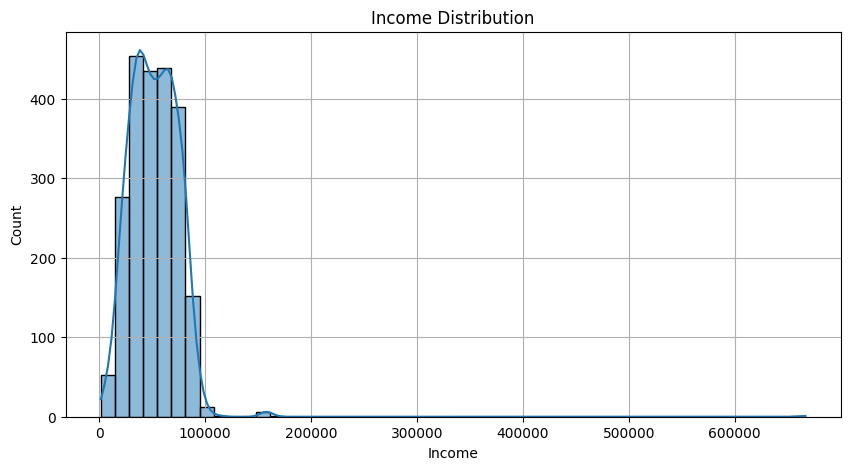

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(init_df['Income'], bins=50, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Спостереження**:

Маємо відсутні значення для Income. Значення ознаки мають досить велике середнє відхилення, що говорить про значну варіативність доходів. також бачимо, що в пристуні викиди: максимум — 666,666, тоді як 75-й перцентиль — лише 68,522.
Бачимо правоскошений розподіл значень.

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

**Вибір стратегії заповнення пропущених значень**

З поппереднього етапу визначено, що маємо пропущені значення в стовпці Income, а розподіл значень є правоскошеним.

Для замповнення пропущшених значень можемо скористатись значенням ***медіани***, оскільки середнє значення спотворюється за рахунок викидів.

Використання більш складніших методів імпотації пропущених значень не є доцільною, оскільки пропущених значнь не велика кількість.




In [13]:
df = init_df.copy()

In [14]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [15]:
df.isnull().values.any()

np.False_

Пропущенні значення для ознаки Income - заповнені медіанним значенням.
Отже, датафрейм більше не має ознак з пропусками.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

Загалом маємо декілька колонок, що потребують кодування: *Education*, *Marital_Status*, *Dt_Customer*

Для кожної з цих колонок застосуємо різні пілходи кодування:
- Education - Ordinal Encoding, оскільки можемо чітко встановити порядок рівнів освіти: `Basic -> 2n Cycle -> Graduation -> Master -> PhD`.

- Marital_Status - найдоцільніще використати OneHot Encoding, оскільки значення не мають іжрархічного порядку, та OneHot Encoding дозволяє представити кожну категорію як бінарну ознаку, що зберігає повну інформацію без створення штучного порядку.

- Dt_Customer - оскільки було б доцільнго мати певні часові патерни, що можуть впливати на поведінку клієнта - перетворимо цю ознаку в декілька ознак, таких як `month`, `weekday`, `is_weekend`. Та застосуємо циклічне перетворення для `weekday` та `month`.

In [16]:
ord_enc_column = "Education"
ord_enc_cat = ["Basic", "2n Cycle", "Graduation", "Master", "PhD"]

one_hot_columns = ["Marital_Status"]

date_column = "Dt_Customer"

In [17]:
def ordinal_encode(df, column, categories):
    encoder = OrdinalEncoder(categories=[categories])
    df[column] = encoder.fit_transform(df[[column]])
    return df

In [18]:
def one_hot_encode(df, categorical_cols):
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    encoder.fit(df[categorical_cols])
    encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

    df[encoded_cols] = encoder.transform(df[categorical_cols])
    df = df.drop(columns=categorical_cols)
    return df, encoded_cols

In [19]:
df[date_column] = pd.to_datetime(df[date_column], format='%d-%m-%Y', errors='coerce')

In [20]:
def encode_date_features(df, date_column):

    df['month'] = df[date_column].dt.month
    df['weekday'] = df[date_column].dt.weekday
    df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

    return df

In [21]:
df = ordinal_encode(df, ord_enc_column, ord_enc_cat)

In [22]:
df, encoded_cols = one_hot_encode(df, one_hot_columns)

In [23]:
df = encode_date_features(df, date_column)

In [24]:
display(df.head(3))

ID  Year_Birth  Education   Income  Kidhome  Teenhome Dt_Customer  \
0  5524        1957        2.0  58138.0        0         0  2012-09-04   
1  2174        1954        2.0  46344.0        1         1  2014-03-08   
2  4141        1965        2.0  71613.0        0         0  2013-08-21   

   Recency  MntWines  MntFruits  ...  Marital_Status_Together  \
0       58       635         88  ...                      0.0   
1       38        11          1  ...                      0.0   
2       26       426         49  ...                      1.0   

   Marital_Status_Widow  Marital_Status_YOLO  month  weekday  is_weekend  \
0                   0.0                  0.0      9        1           0   
1                   0.0                  0.0      3        5           1   
2                   0.0                  0.0      8        2           0   

   month_sin     month_cos  weekday_sin  weekday_cos  
0  -1.000000 -1.836970e-16     0.781831     0.623490  
1   1.000000  6.123234e-17    -0.974928    -0.222521  
2  -0.866025 -5.000000e-01     0.974928    -0.222521  

[3 rows x 43 columns]

Додамо ще декілька агрегований ознак для даного набору даних.

- `MntTotal`- загальна сума витрат на товари. Для цієї змінної об'єднаємо всі витрати клієнта в одну загальну змінну. Це дозволить оцінити більш узагальнено споживчу активність, та дозволить лослідити загальний рівень витрат без врахування типу продукту. Це дасть можливість легше порівняти клієнтів.

- `NumPurchasesTotal` - загальна кількість покупок. Дана змінна відображає загальну активність клієнта щодо покупок об'єднавши всі канали продажів.

In [25]:
additional_features = ["MntTotal", "NumPurchasesTotal"]

df["MntTotal"] = (
  df["MntWines"] +
  df["MntFruits"] +
  df["MntMeatProducts"] +
  df["MntFishProducts"] +
  df["MntSweetProducts"] +
  df["MntGoldProds"]
)

df["NumPurchasesTotal"] = (
    df["NumWebPurchases"] +
    df["NumCatalogPurchases"] +
    df["NumStorePurchases"]
)

Створемо також додаткові ознаки, що потенційно допоможуть нам відрізнити одну групу клієнтів від іншої.

- `Age` - вік клієнта на момент реестрації. Оскільки вік клієнта більш інформативніший за рік народження, можемо спробувати його розрахувати. Використання поточного року для розрахунку даної ознаки - не є корректним, оскільки остаточно не відомо наскільки дані є свіжими, то ж у випадку історичних данних ми можемо їх спотворити. Тому будемо розраховувати вік клієнта на момент початку співпраці, а отже, вік буде узгоджений із періодом витрат.

In [26]:
df["Age"] = df["Dt_Customer"].dt.year - df["Year_Birth"]

In [27]:
mnt_columns = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

pct_columns = []

for col in mnt_columns:
    pct_col = f"Pct{col[3:]}"
    pct_columns.append(pct_col)
    df[pct_col] = df[col] / df["MntTotal"]
    df[pct_col] = df[pct_col].fillna(0)

In [28]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Education                2240 non-null   float64       
 3   Income                   2240 non-null   float64       
 4   Kidhome                  2240 non-null   int64         
 5   Teenhome                 2240 non-null   int64         
 6   Dt_Customer              2240 non-null   datetime64[ns]
 7   Recency                  2240 non-null   int64         
 8   MntWines                 2240 non-null   int64         
 9   MntFruits                2240 non-null   int64         
 10  MntMeatProducts          2240 non-null   int64         
 11  MntFishProducts          2240 non-null   int64         
 12  MntSweetProducts         2240 non-

Зберемо всі створені та орброблені ознаки разом.

In [29]:
date_features = ["month_sin", "month_cos", "weekday_sin", "weekday_cos", "is_weekend"]

prepared_features = encoded_cols + date_features + additional_features + pct_columns
prepared_features.append("Age")

prepared_features

['Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO',
 'month_sin',
 'month_cos',
 'weekday_sin',
 'weekday_cos',
 'is_weekend',
 'MntTotal',
 'NumPurchasesTotal',
 'PctWines',
 'PctFruits',
 'PctMeatProducts',
 'PctFishProducts',
 'PctSweetProducts',
 'PctGoldProds',
 'Age']

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [30]:
core_features = [
    "NumDealsPurchases", "NumWebVisitsMonth", "Recency",
    "Income", "Kidhome", "Teenhome", "Education"
]

In [31]:
X_columns = core_features + prepared_features
print(X_columns)

['NumDealsPurchases', 'NumWebVisitsMonth', 'Recency', 'Income', 'Kidhome', 'Teenhome', 'Education', 'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'is_weekend', 'MntTotal', 'NumPurchasesTotal', 'PctWines', 'PctFruits', 'PctMeatProducts', 'PctFishProducts', 'PctSweetProducts', 'PctGoldProds', 'Age']


In [32]:
X = df[X_columns]

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NumDealsPurchases        2240 non-null   int64  
 1   NumWebVisitsMonth        2240 non-null   int64  
 2   Recency                  2240 non-null   int64  
 3   Income                   2240 non-null   float64
 4   Kidhome                  2240 non-null   int64  
 5   Teenhome                 2240 non-null   int64  
 6   Education                2240 non-null   float64
 7   Marital_Status_Absurd    2240 non-null   float64
 8   Marital_Status_Alone     2240 non-null   float64
 9   Marital_Status_Divorced  2240 non-null   float64
 10  Marital_Status_Married   2240 non-null   float64
 11  Marital_Status_Single    2240 non-null   float64
 12  Marital_Status_Together  2240 non-null   float64
 13  Marital_Status_Widow     2240 non-null   float64
 14  Marital_Status_YOLO     

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

labels = kmeans.predict(X)
X_with_clusters = X.copy()
X_with_clusters["cluster"] = kmeans.labels_

print(silhouette_score(X, kmeans.labels_))

0.5983503647132267


**Спостереження**:


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [35]:
def visualize_three_features(df, feature_1, feature_2, feature_3):
  plt.figure(figsize=(18, 5))

  plt.subplot(1, 3, 1)
  sns.scatterplot(data=df, x=feature_1, y=feature_2, hue="cluster", palette="Set1")
  plt.title(f"{feature_1} vs {feature_2}")

  plt.subplot(1, 3, 2)
  sns.scatterplot(data=df, x=feature_1, y=feature_3, hue="cluster", palette="Set1")
  plt.title(f"{feature_1} vs {feature_3}")

  plt.subplot(1, 3, 3)
  sns.scatterplot(data=df, x=feature_2, y=feature_3, hue="cluster", palette="Set1")
  plt.title(f"{feature_2} vs {feature_3}")

  plt.tight_layout()
  plt.show()

Проаналізуємо 3 основних ознаки, що добре відображають загальну поведінку клієнтів:

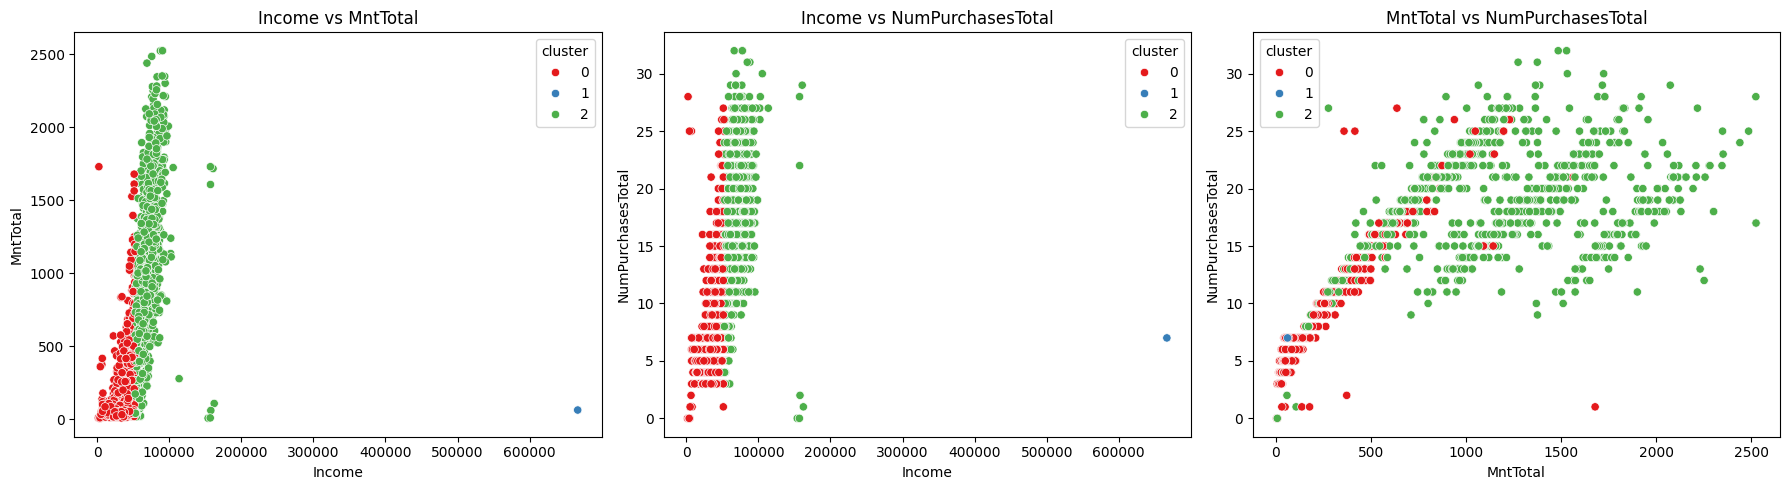

In [36]:
visualize_three_features(X_with_clusters, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

- Income vs MntTotal
  - Кластер 0 - зосереджений у нижньому лівому куті. Це кієнти з низькими доходами та вистратами.
  - Кластер 1 - За цей кластер було принято наявні в наборі даних викиди у совпці доходу.
  - Кластер 2 - більш розтягнутий по осі доходу та по осі загальних витрат, включає клієнтів із середнім і високим доходом. Отже, основна маса активних покупців.

- Income vs NumPurchasesTotal
  - Кластер 0 - покупці з меншими доходами, що мать меншу загальну кількість покупок
  - Кластер 1 - виглядає як мало покупок, хоча дохід дуже високий, що обумовлено викидами.
  - Кластер 2 - покупці з більшою кількістю покупок.

- MntTotal vs NumPurchasesTotal (Присутній ліній партерн більше покупок - більші витрати.)
  - Кластер 0 - нижчі значення обох параметрів.
  - Кластер 1 - нову виглядає як викид.
  - Кластер 2 - домінує по обох параметрах, це клієнти, що більше витрачають і є більш активними.

Візуалізуємо NumDealsPurchases vs NumPurchasesTotal vs Age

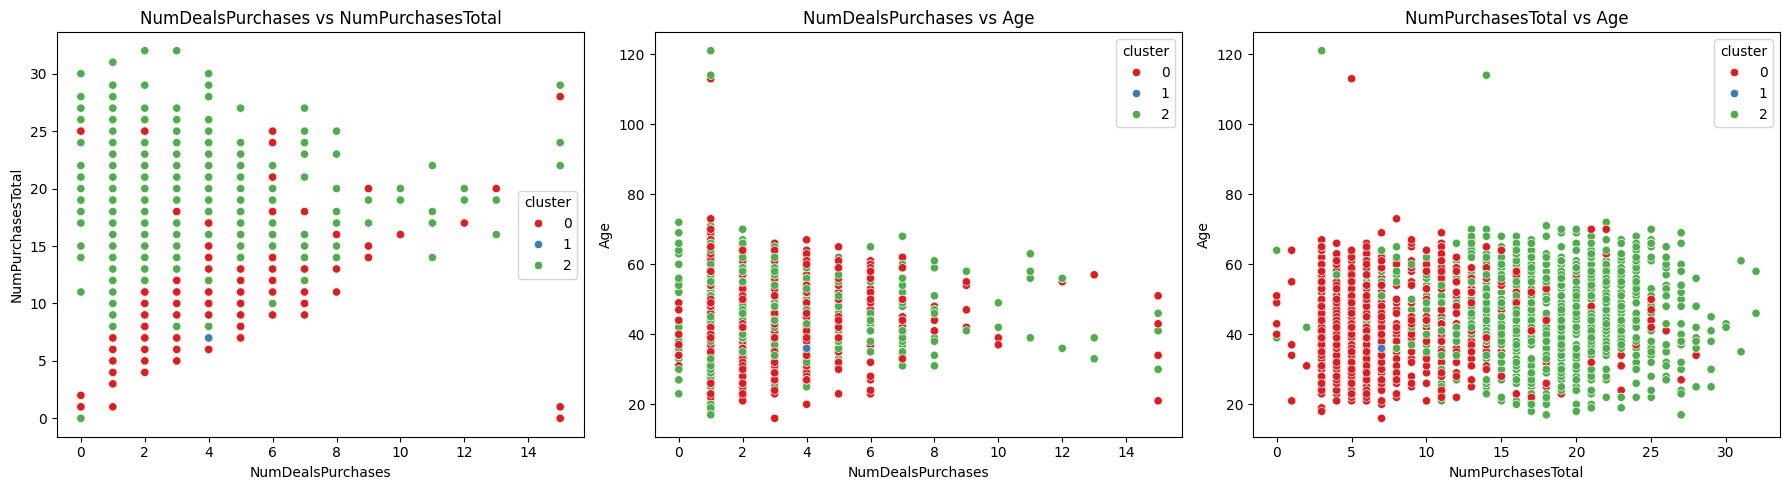

In [37]:
visualize_three_features(X_with_clusters, "NumDealsPurchases", "NumPurchasesTotal", "Age")

**Спостереження**:

- NumDealsPurchases vs NumPurchasesTotal
  - Кластер 0 - роблять менше покупок загалом
  - Кластер 1 - одинокий випадок з низькими обома метриками — вже класичний викид.
  - Кластер 2 - клієнти роблять багато покупок загалом і водночас часто використовують знижки.

- NumDealsPurchases vs Age
  Обидва основні кластери рівномірно покривають вік 20–70. Достатньо важко видилити в цьому розрізі спільні особливості для кластерів.

- NumPurchasesTotal vs Age
  - Кластер 0 - менше покупок, незалежно від віку. Виглядає як пасивні або одноразові клієнти, навіть якщо вік молодий чи середній.
  - Кластер 2 - має більше активних покупців у всіх вікових групах.



Проаналізуємо відношення витрат клієнтів.

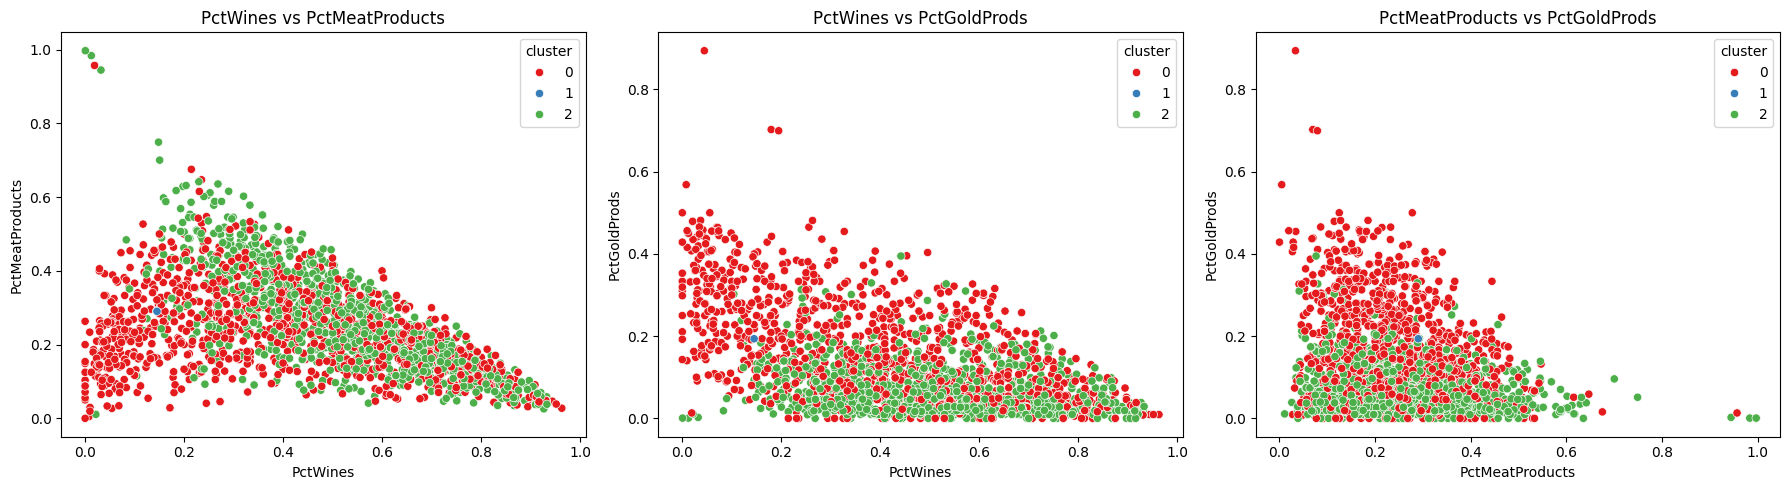

In [38]:
visualize_three_features(X_with_clusters, "PctWines", "PctMeatProducts", "PctGoldProds")

**Спостереження**:

- PctWines vs PctMeatProducts (є видимий компроміс: чим більше витрачають на вино — тим менше на м’ясо, і навпаки):

  - Кластер 0 - витрачають меншу частку на вино, більша частка витрат на м'ясні продукти.
  -  Кластер 1 - маємо більше точок з вищою часткою витрат на вино.

- PctWines vs PctGoldProds
  - Кластер 0 - відрізняється великою кількістю червоних точок вище 0.2 по PctGoldProds. Можливо, є підгрупа клієнтів, що купують менше продуктів загалом, але більше витрачають на коштовності.
  - Кластер 2 - Зашалом мають нижчу частку витрат на дорогоцінності.

- PctMeatProducts vs PctGoldProds
  -  Кластер 0 - знову має більшу частку з витратами на коштовності.
  -  Кластер 2 - Менше чкастка витрарт на коштовності, більша на м'ясні продукти.

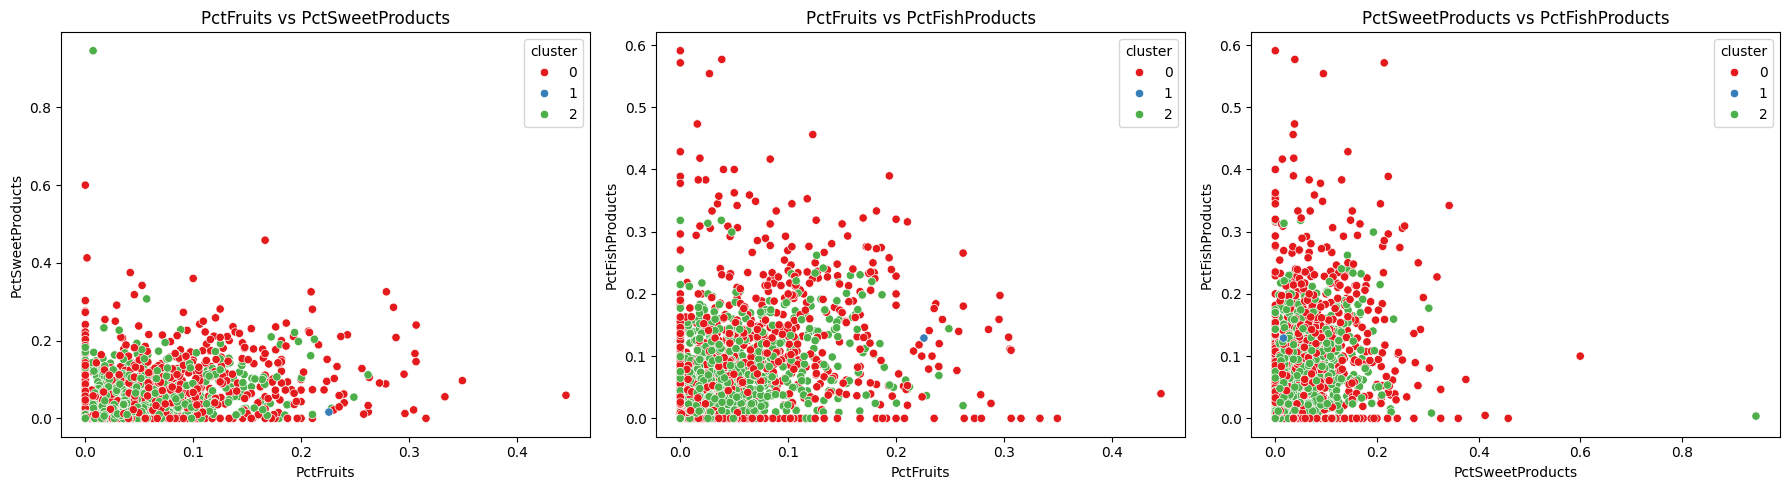

In [39]:
visualize_three_features(X_with_clusters, "PctFruits", "PctSweetProducts", "PctFishProducts")

**Спостереження**:

- PctFruits vs PctSweetProducts:
  - Кластер 0 - розкиданий по всій площині, включаючи точок із високими солодощами.
  - Кластер 2 - незначно схильний до нижчих значень частки витрат на солодощі

- PctFruits vs PctFishProducts:
 Більшість точок зосереджені нижньому лівому куті.
 - Кластер 0 - має більший розкид відсотку витрат по рибній продукції і по фруктам.
 - Кластер 2 - більш компактний по обом ознакам.

- PctSweetProducts vs PctFishProducts:
 Більшість точок зосереджені нижньому лівому куті.
 - Кластер 0 - має більший розкид відсотку витрат по обом ознакам.
 - Кластер 2 - більш компактний по обом ознакам.

Клієнти загалом мало витрачають на фрукти та солодощі у відсотковому розрахунку.

Проаналізуємо взаємозв’язки між освітою, віком і витратами.

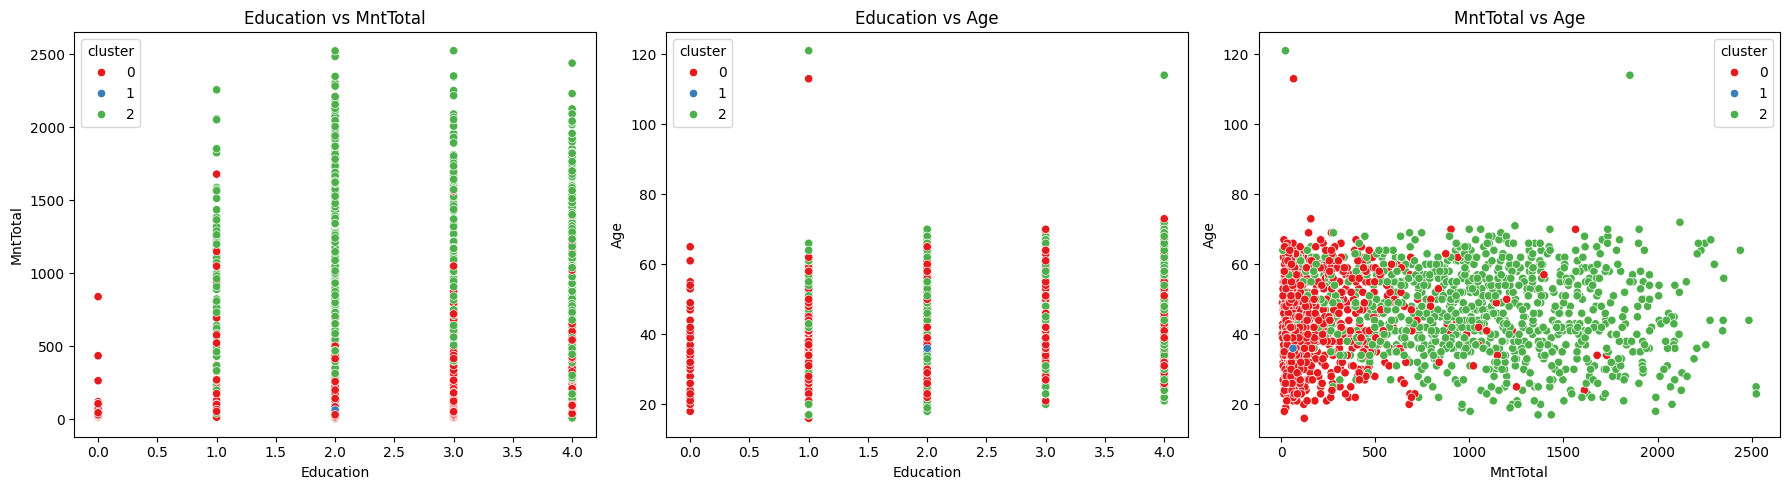

In [40]:
visualize_three_features(X_with_clusters, "Education", "MntTotal", "Age")

**Спостереження**:

- Education vs MntTotal
  - Кластер 0 - рівномірно розподілений по освіті, але має нижчі витрати.
  - Кластер 2 - наявний у всіх освітніх рівнях і стабільно має вищі витрати, незалежно від освіти.

- Education vs Age
  - Кластер 0 - представлений у всіх освітніх рівнях.
  - Кластер 2 - представлений трохи більше у Master/PhD.

- MntTotal vs Age
  - Кластер 0 - витрати зосереджені часто до  500, незалежно від віку.
  - Кластер 2 - домінує у вищих витратах по всіх вікових групах.

**Загальне спостереження**:

- Кластер 0 - Клієнти з нижчим доходом, менш активні у покупках, рідше користуються знижками, але можуть витрачати трохи більше на коштовності чи окремі категорії товарів.

- Кластер 1 - Одинокий клієнт із надзвичайно високим доходом та нетиповою поведінкою — ймовірно, викид, який не формує окрему повноцінну групу.

- Кластер 2 - Найактивніший сегмент. Клієнти з різним рівнем доходу, але високою купівельною активністю, схильністю до знижок, регулярними покупками. Витрачають на вино, м’ясо, фрукти в різних пропорціях.

Можна мказати, що лкастери мають сенс, вони є інтерпретованими та добре пояснюють різні типи клієнтів. Але наявність викдів спотворює розбиття.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [41]:
scale_columns = [
    "Income", "MntTotal", "NumPurchasesTotal",
    "NumDealsPurchases", "NumWebVisitsMonth", "Recency",
    "Age", "Education"
] + [col for col in X.columns if col.startswith("Pct")]

In [42]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[scale_columns] = scaler.fit_transform(X_scaled[scale_columns])

In [43]:
X_scaled.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NumDealsPurchases        2240 non-null   float64
 1   NumWebVisitsMonth        2240 non-null   float64
 2   Recency                  2240 non-null   float64
 3   Income                   2240 non-null   float64
 4   Kidhome                  2240 non-null   int64  
 5   Teenhome                 2240 non-null   int64  
 6   Education                2240 non-null   float64
 7   Marital_Status_Absurd    2240 non-null   float64
 8   Marital_Status_Alone     2240 non-null   float64
 9   Marital_Status_Divorced  2240 non-null   float64
 10  Marital_Status_Married   2240 non-null   float64
 11  Marital_Status_Single    2240 non-null   float64
 12  Marital_Status_Together  2240 non-null   float64
 13  Marital_Status_Widow     2240 non-null   float64
 14  Marital_Status_YOLO     

In [44]:
display(X_scaled.head(3))

NumDealsPurchases  NumWebVisitsMonth   Recency    Income  Kidhome  \
0           0.349414           0.693904  0.307039  0.235696        0   
1          -0.168236          -0.130463 -0.383664 -0.235454        1   
2          -0.685887          -0.542647 -0.798086  0.773999        0   

   Teenhome  Education  Marital_Status_Absurd  Marital_Status_Alone  \
0         0  -0.458383                    0.0                   0.0   
1         1  -0.458383                    0.0                   0.0   
2         0  -0.458383                    0.0                   0.0   

   Marital_Status_Divorced  ...  is_weekend  MntTotal  NumPurchasesTotal  \
0                      0.0  ...           0  1.679417           1.313544   
1                      0.0  ...           1 -0.961275          -1.185022   
2                      0.0  ...           0  0.282673           1.035926   

   PctWines  PctFruits  PctMeatProducts  PctFishProducts  PctSweetProducts  \
0 -0.288049   0.088036         0.696296         0.447256          0.059580   
1 -0.223655  -0.223214        -0.215520         0.032632         -0.224620   
2  0.396250   0.244202        -0.678081         0.918056         -0.387691   

   PctGoldProds       Age  
0     -0.603639  0.896633  
1      0.936328  1.312600  
2     -0.606375  0.314278  

[3 rows x 29 columns]

In [45]:
kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_scaled.fit(X_scaled)

labels = kmeans_scaled.predict(X_scaled)
X_with_clusters_scaled = X_scaled.copy()
X_with_clusters_scaled["cluster"] = kmeans_scaled.labels_

silhouette_scaled = silhouette_score(X_scaled, kmeans_scaled.labels_)
print(silhouette_scaled)

0.1483289689517356


**Спостереження**:

Значення метрики силуету значно знизилось після масштабування ознак.

***Кластери були перебудовані після масштабування, тому позначки кластерів не відповідають попереднім експериментам.***

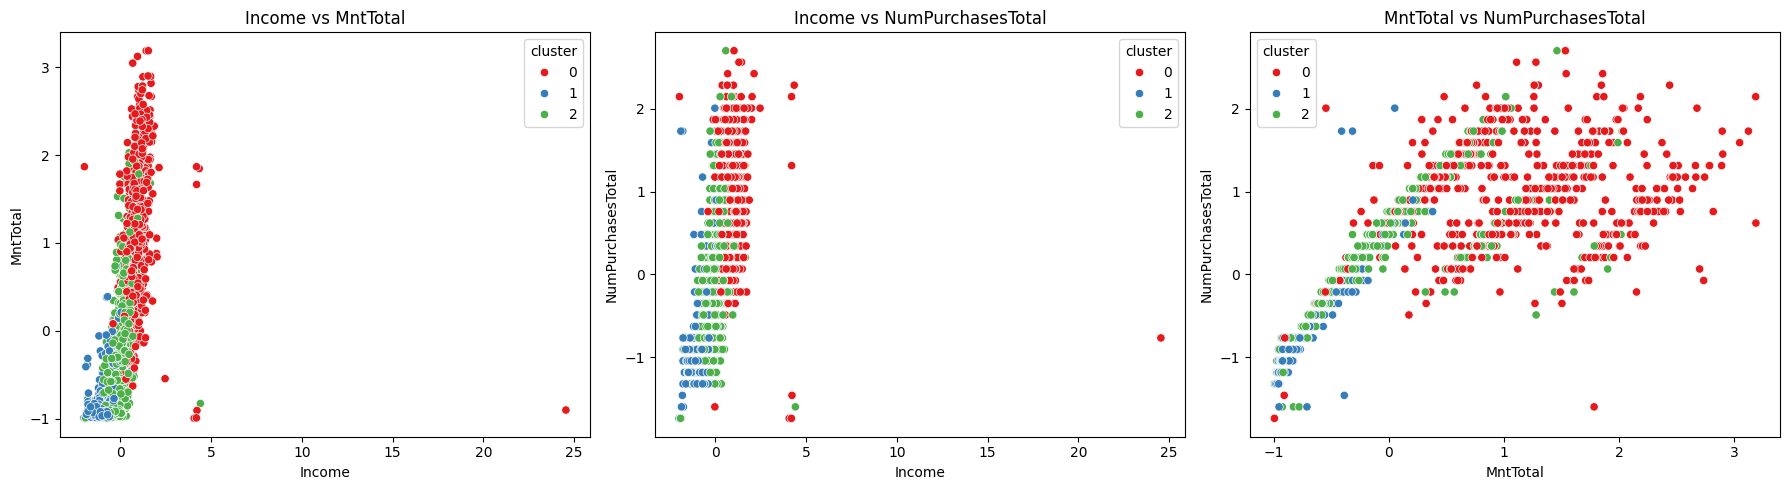

In [46]:
visualize_three_features(X_with_clusters_scaled, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

Бачимо, що маємо інше розбиття. Можемо Сказати, що межі кластерів стали менш чіткі. `Income` не є сильним роздільником — користувачі з однаковим доходом потрапляють у різні кластери.

- Income vs MntTotal
  - Кластер 0 - найбільший кастер, має найбільші значення по осі доходу та по осі загальних витрат, включає клієнтів із исоким доходом.
  - Кластер 1 - кластер кліжнтів з найменшим рівнем доходу та витрат.
  - Кластер 2 - кластер клієнтів з порівняно середнім рівнем витрат та доходів.

- Income vs NumPurchasesTotal

  - Кластер 0 - покупці з більшою кількістю покупок.
  - Кластер 1 - покупці з меншими доходами, що мать меншу загальну кількість покупок.
  - Кластер 2 - покупці з середнімі показниками кількості покупок.

- MntTotal vs NumPurchasesTotal (Присутній ліній партерн більше покупок - більші витрати.)

  - Кластер 0 - домінує по обох параметрах, це клієнти, що більше витрачають і є більш активними.
  нижчі значення обох параметрів.
  - Кластер 1 - нижчі значення обох параметрів.
  - Кластер 2 - представляє більш середні показники по обом ознакам.


Кластери мають деяку різницю в інтенсивності споживання, але межі між ними нечіткі.

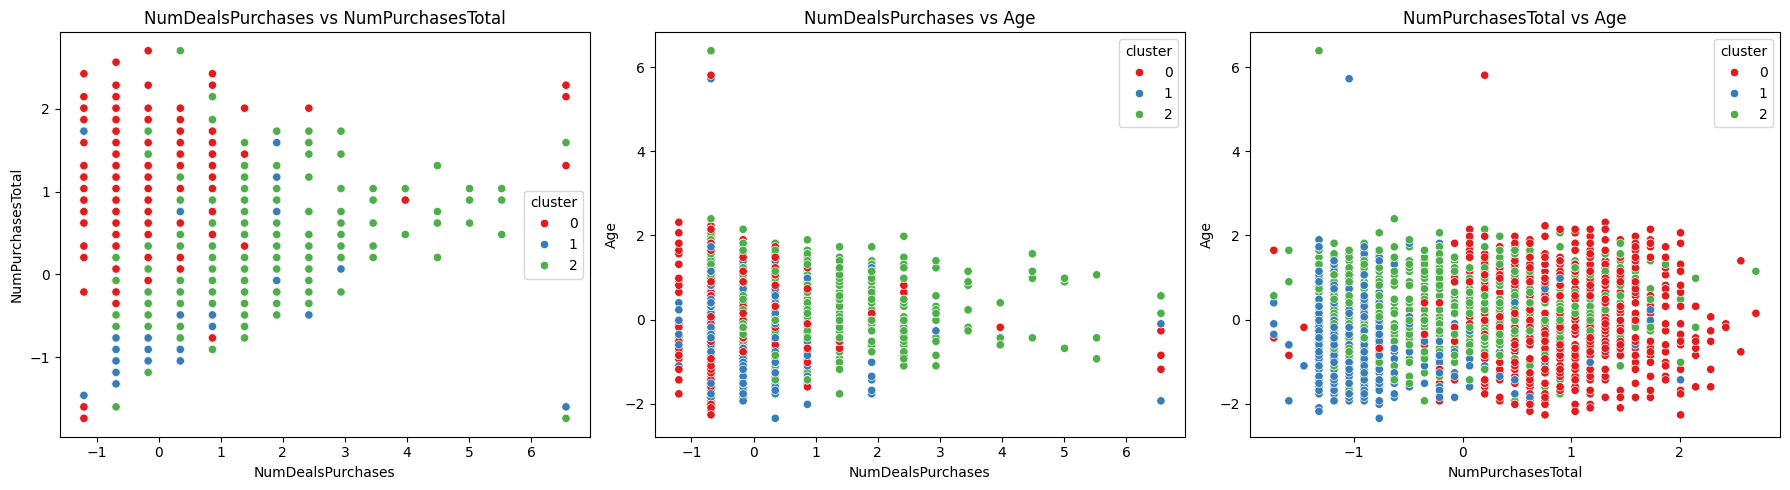

In [47]:
visualize_three_features(X_with_clusters_scaled, "NumDealsPurchases", "NumPurchasesTotal", "Age")

**Спостереження**:

Спостерігаються схожі тренди активності по кластеру, але точок багато, і межі нечіткі. Age не дає сильного поділу — більшість вікових груп присутні у всіх кластерах.

- NumDealsPurchases vs NumPurchasesTotal
  - Кластер 0 - Мають велику кількість покупок, та мешне користуються щнижками.
  - Кластер 1 - роблять менше покупок загалом.
  - Кластер 2 - клієнти роблять багато покупок загалом і водночас часто використовують знижки.

- NumDealsPurchases vs Age - вік практично не має впливу.

- NumPurchasesTotal vs Age
  - Кластер 0 - роблять набільше покупок загалом
  - Кластер 1 - менше покупок, незалежно від віку. Виглядає як пасивні або одноразові клієнти.
  - Кластер 2 - клієнти роблять середню кількість  покупок загалом.

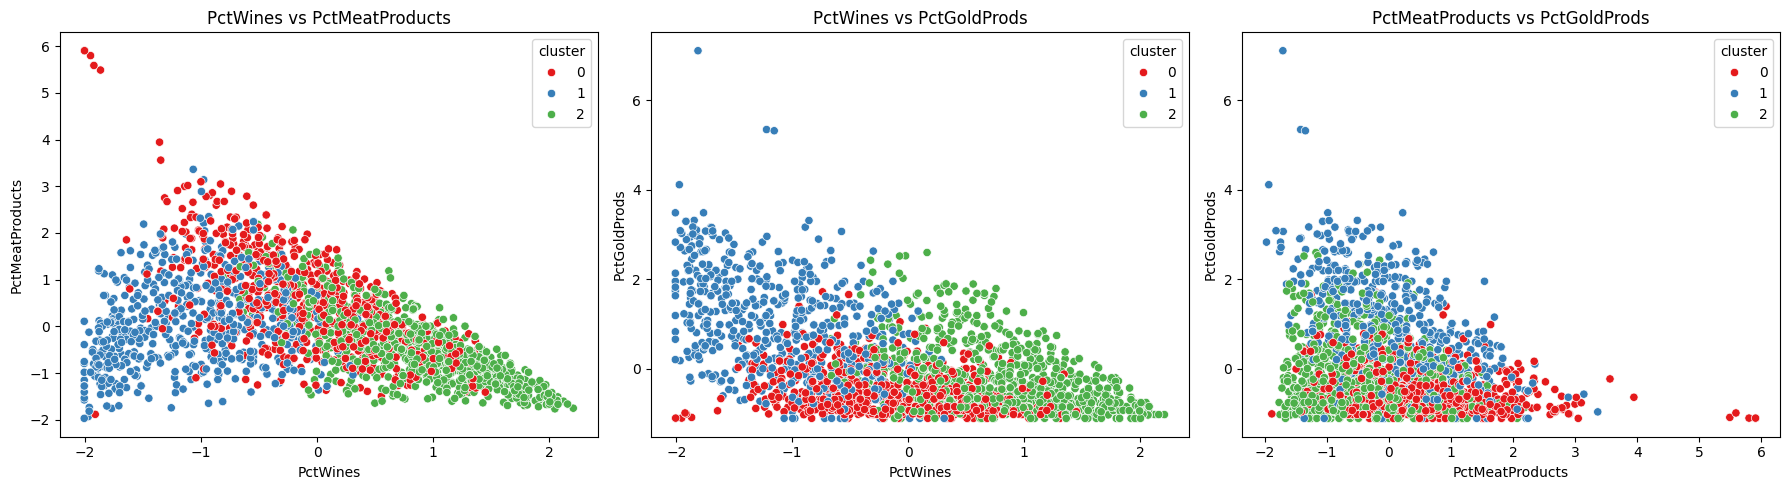

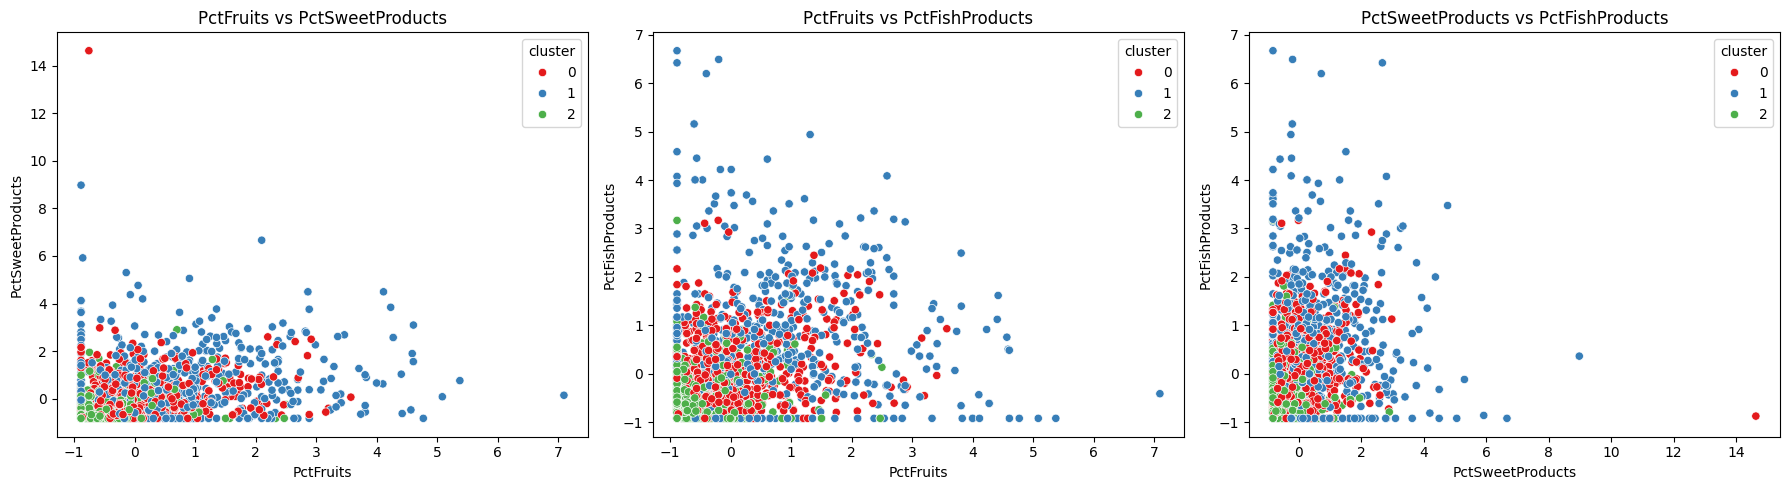

In [48]:
visualize_three_features(X_with_clusters_scaled, "PctWines", "PctMeatProducts", "PctGoldProds")
visualize_three_features(X_with_clusters_scaled, "PctFruits", "PctSweetProducts", "PctFishProducts")

**Спостерження**:

- PctWines, PctMeatProducts, PctGoldProds:
  - Спостерігається розподіл уподобань: наприклад, один кластер має вищі частки витрат на м'ясо, інший — на вино.
  - Загалом відсоток витрат на м'ясні продукти вище у кластеру 0, на коштовності у кластера 1, а на вино - клстер 2.
  - Хоча кластери частково накладаються, відмінності у вподобаннях до категорій товарів помітні.


- PctFruits, PctSweetProducts, PctFishProducts:
  - Бачимо, що значна частина користувачів зосереджена у нижньому лівому куті — тобто мало витрачає на ці категорії.
  - найменші витрати на ці 3 категорії товарів - у кластеру 2. Кластер 1 - має найвищий відсоток витрат на ці категорії. Кластер 0 - має відсомно середній відсоток витрат.
  - Вцілому споживання менш важливих категорій (фрукти, риба, солодощі) не дає сильного поділу, але все ж показує варіативність споживачів.

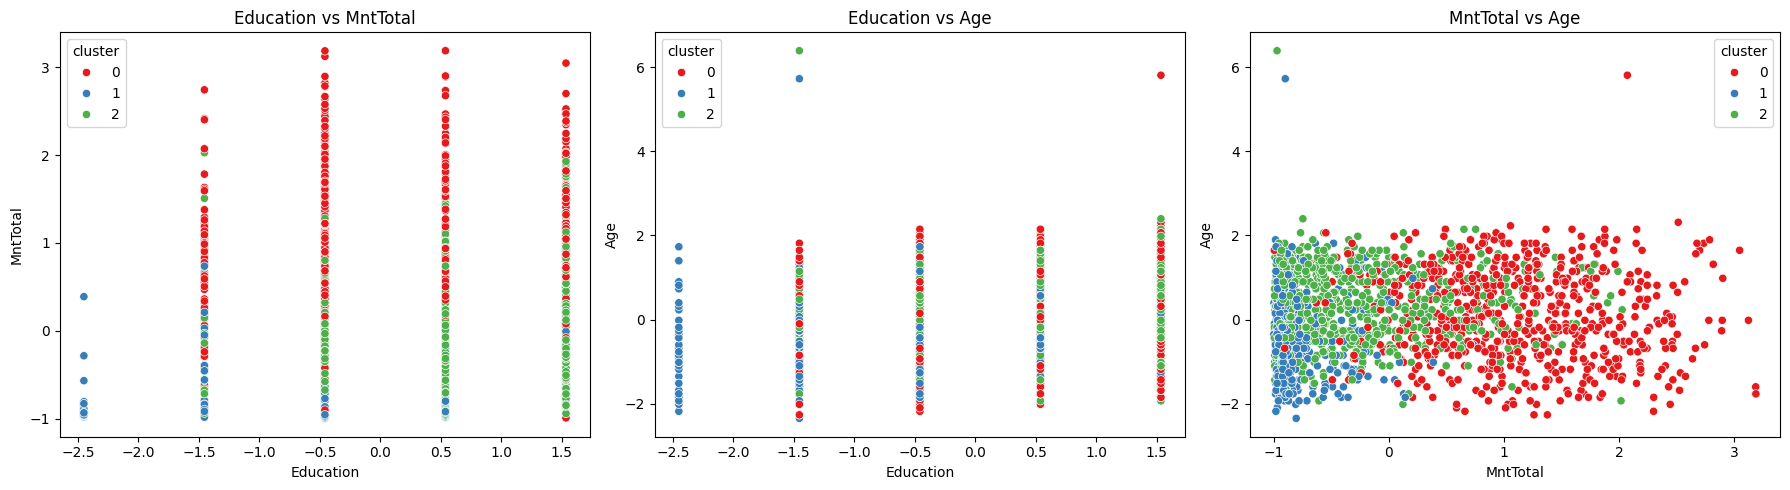

In [49]:
visualize_three_features(X_with_clusters_scaled, "Education", "MntTotal", "Age")

**Спостереження**:

- Витрати все ще відіграють важливу роль у формуванні кластерів.
- Education не є ключовою ознакою поділу — всі кластери рівномірно представлені в усіх рівнях освіти.
- Кластери мають різний розкид по віку — один більш “сконцентрований”, інший — різновіковий.

**Загальні постереження**:

Після масштабування став помітним ще один кластер, який був практично відсутній при моделюванні без скейлингу.

Загалом отримали структуровану, але менш чітку кластеризацію.
Хоча частина кластерів відображає різні стилі витрат, активності та споживчих уподобань, зони перекриття значні, що говорить про помірну якість сегментації.

Значення метрики силуету також значно знизились після масштабування. Викиди продовжують спотворювати розбиття.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [50]:
def remove_outliers_percentile(df, columns, lower=0.01, upper=0.99):
    filtered_df = df.copy()
    for col in columns:
        lower_bound = filtered_df[col].quantile(lower)
        upper_bound = filtered_df[col].quantile(upper)
        filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]
    return filtered_df

In [51]:
X.shape

(2240, 29)

In [52]:
important_columns = ["Income", "MntTotal", "NumPurchasesTotal"]
X_filt = remove_outliers_percentile(X, important_columns, lower=0.01, upper=0.99)

In [53]:
X_filt.shape

(2133, 29)

In [54]:
scaler = StandardScaler()
X_scaled_f = X_filt.copy()
X_scaled_f[scale_columns] = scaler.fit_transform(X_scaled_f[scale_columns])

In [55]:
X_scaled_f.shape

(2133, 29)

In [56]:
kmeans_scaled_f = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_scaled_f.fit(X_scaled_f)

labels = kmeans_scaled_f.predict(X_scaled_f)
X_with_clusters_scaled_f = X_scaled_f.copy()
X_with_clusters_scaled_f["cluster"] = kmeans_scaled_f.labels_

silhouette_scaled_f = silhouette_score(X_scaled_f, kmeans_scaled_f.labels_)
silhouette_scaled_f

np.float64(0.15374640535233458)

**Спостереження**:

Після видалення викдидів значення метрики силуету зросла у порівнянні з застосуванням лише масштабування без обробки викидів, але значення метрики все ще залишається достатньо низьким.

***Кластери були перебудовані після обробки викидів і масштабування, тому позначки кластерів не відповідають попереднім експериментам.***

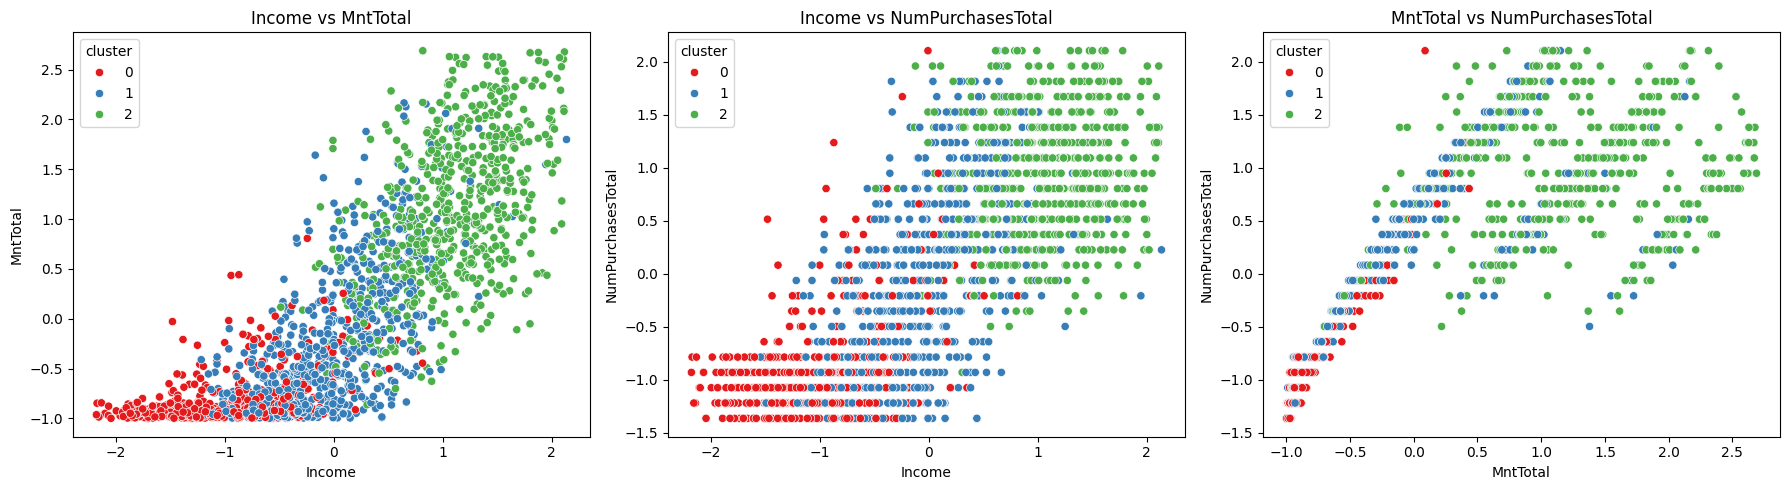

In [57]:
visualize_three_features(X_with_clusters_scaled_f, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

- Income vs MntTotal
  - Можемо більш чітко продивитись розділення між кластерами, але ж граничні значення все зе змішуються.
  - Бачимо юільш сітку сегменитацію:
    - Кластер 0 — низький дохід, малі витрати.
    - Кластер 1 — середній дохід і витрати.
    - Кластер 2 — високий дохід, великі витрати.

- Income vs NumPurchasesTotal
  - Кластер 0 — низький дохід, найменше покупок.
  - Кластер 1 — середній дохід і середня кількість покупок.
  - Кластер 2 — високий дохід, більша кількість покупок.

- MntTotal vs NumPurchasesTotal
  - Кластер 0 — найменше покупок, найменша сума витарат.
  - Кластер 1 — середня кількість покупок, середня сума витрат.
  - Кластер 2 — більша кількість покупок, більша кількість витрат.

Кластери стади більш внтерпретовні. Маємо більш чітке розділення в стилі low / medium / high.

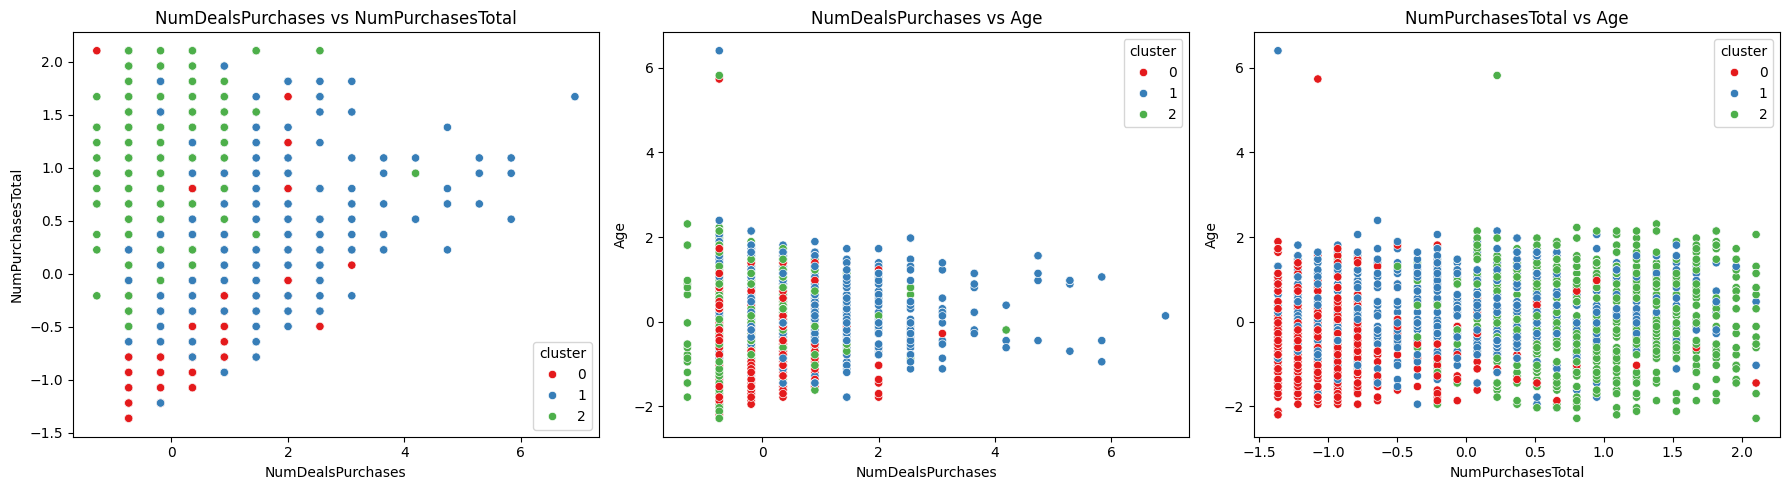

In [58]:
visualize_three_features(X_with_clusters_scaled_f, "NumDealsPurchases", "NumPurchasesTotal", "Age")

**Спостереження**:

- NumDealsPurchases vs NumPurchasesTotal
  - Кластер 0 — низька кількість покупок, мало знижок.
  - Кластер 1 — оступово збільшується активність, частіше використовують знижки.
  - Кластер 2 — найвищі значення — активні покупці, не дуже сильно використовують знижки.

- NumDealsPurchases vs Age:
 - Вік не дає чіткого розбиття.

- NumPurchasesTotal vs Age:
  - Кластер 0 — низька кількість покупок, розкид по всьому діапазону Age.
  - Кластер 1 — оступово збільшується активність щодо покупок, розкид по всьому діапазону Age.
  - Кластер 2  - розкид по всьому діапазону Age, більша кількість покупок.

- Кластери відрізняються активністю та відкликом на акційні пропозиції, частково незалежно від віку.

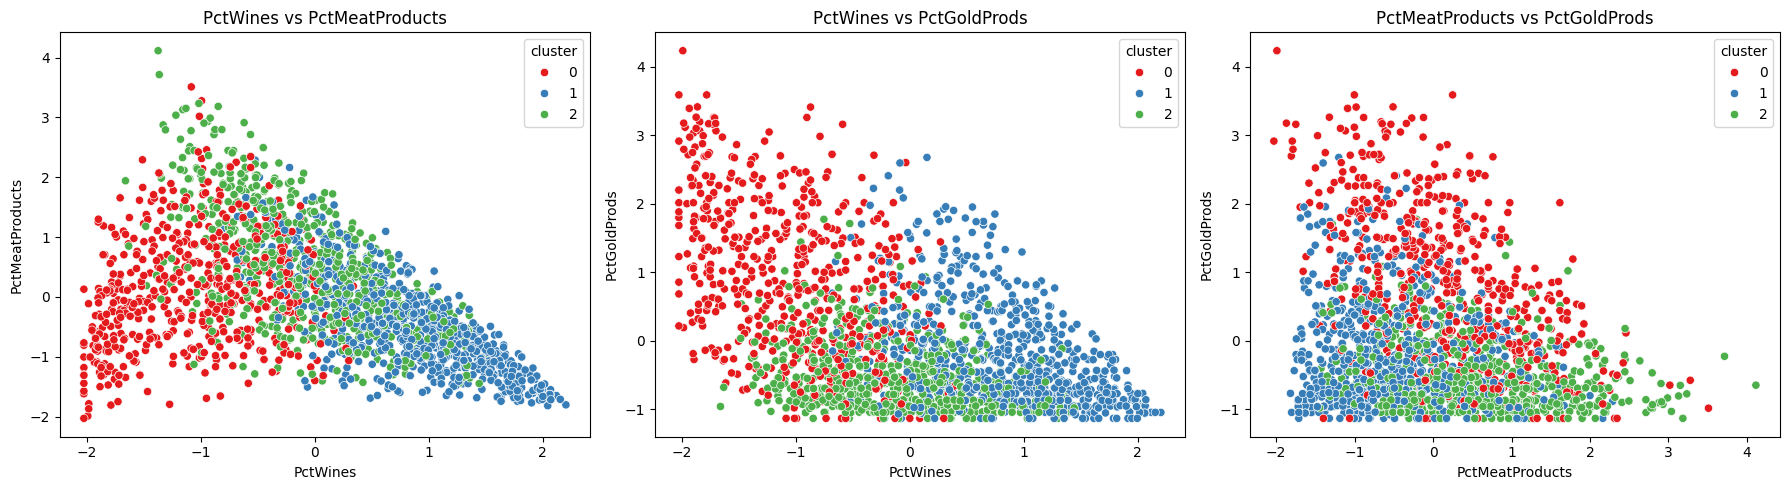

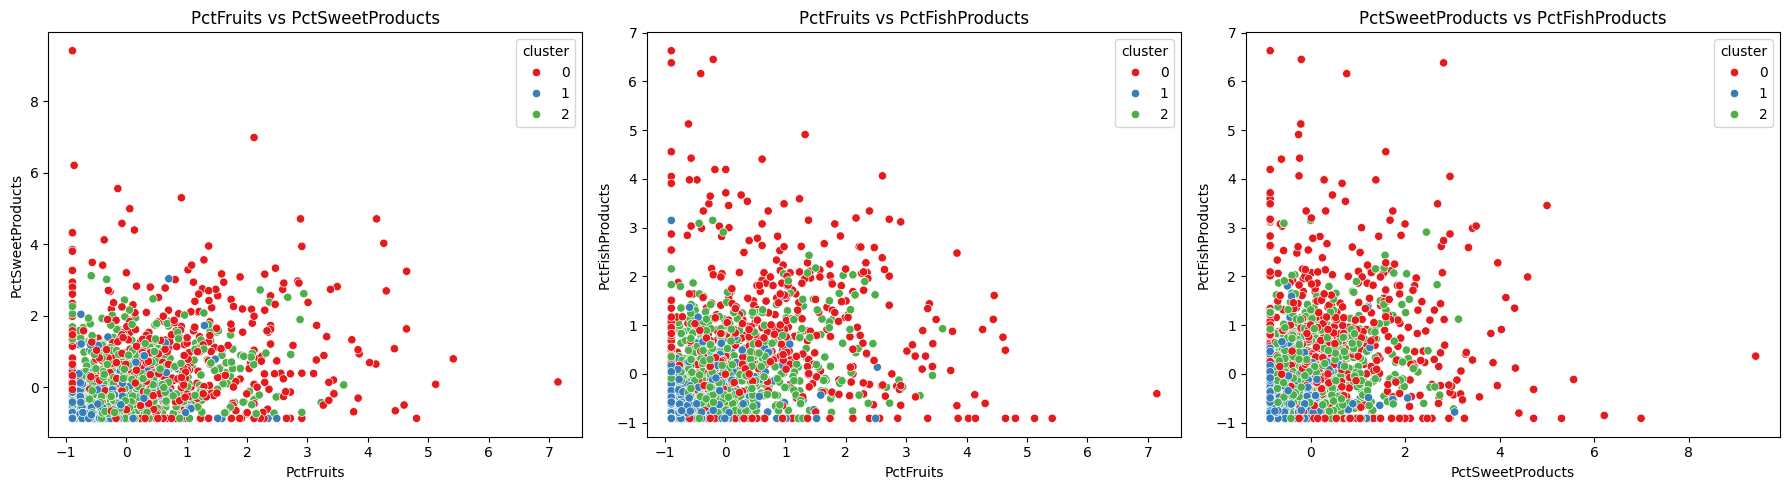

In [59]:
visualize_three_features(X_with_clusters_scaled_f, "PctWines", "PctMeatProducts", "PctGoldProds")
visualize_three_features(X_with_clusters_scaled_f, "PctFruits", "PctSweetProducts", "PctFishProducts")

**Спостереження**:

- PctWines, PctMeatProducts, PctGoldProds:
  - Кластер 0 — більша частина витрат на м’ясну продукцію. Також маємо більшу частину витрат на коштовності.
  - Кластер 1 — більша частина витрат на вина, загалом комбінує вино з коштовностями.
  - Кластер 2 — баланс між вином та м'ясом, має найменшу частину витрат на кооштовності.

Кластери мають виражені вподобання у стилі витрат.

- PctFruits, PctSweetProducts, PctFishProducts
  - Розподіл витрат на “додаткові” категорії також може допомогти розрізнити кластери: хто дозволяє собі більше солодощів, а хто витрачає меншу частину.
  Але маємо вже менш чіткі межі.


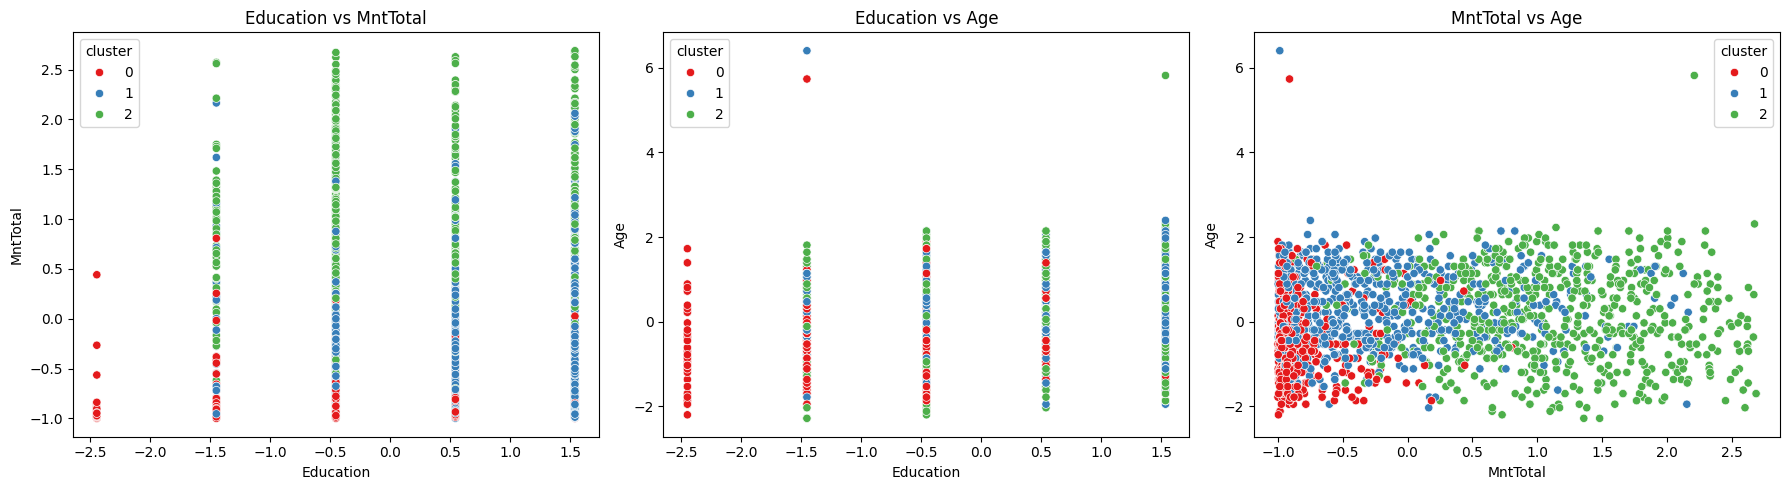

In [60]:
visualize_three_features(X_with_clusters_scaled_f, "Education", "MntTotal", "Age")

**Спостереження**:

- Витрати не залежать лінійно від освіти, але кластер 2 — провідний за витратами в будь-якому освітньому рівні.
- Кластер 2 чітко домінує в категоріях з високими витратами, незалежно від освіти.
- Освіта — нейтральна ознака, але може частково підсилювати вплив на поведінку в комбінації з витратами.

**Загальні спостереження**:

- Кластери мають поступову градацію активності та витратної поведінки:
від менш залучених клієнтів до активних покупців із високим рівнем споживання.

- Результати достатньо сегментовані на основних ознаках, це гарно видно, хоча граничні значення перетинаються.

- Значення матрики силуету залишається дуже низькою.

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

In [61]:
def apply_elbow_method(df):
  K = range(1,10)
  sum_of_squared_distances = []

  for k in K:
      model = KMeans(n_clusters=k, n_init='auto').fit(df)
      sum_of_squared_distances.append(model.inertia_)

  plt.plot(K, sum_of_squared_distances, 'bx-')
  plt.xlabel('K values')
  plt.ylabel('Sum of Squared Distances')
  plt.title('Elbow Method')
  plt.show()


Застосуємо Elbow method на масштабованих даниз з видаленими викидами:

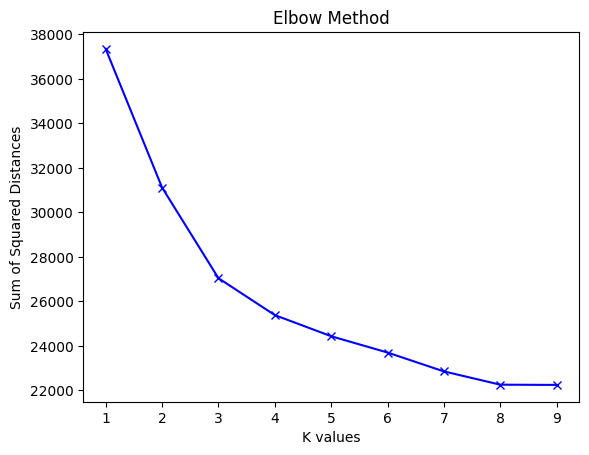

In [62]:
apply_elbow_method(X_scaled_f)

Застосуємо Elbow method на НЕ масштабованих даниз з видаленими викидами:

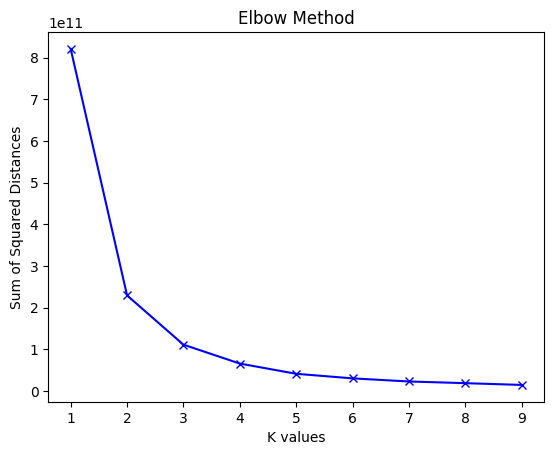

In [63]:
apply_elbow_method(X_filt)

**Спостереження**:

- На першій візуалізації (масштабовані дані) маємо чітке плече на `k = 3`, далі спад менш значущий. Отже - три кластери — оптимальне рішення.

- На друій візуалізаціх (немасштабовані дані) маємо гострий злам на `k = 2`, після чого спад сповільнюється, плече чіткіше на `k = 2`.


Отримавши висновок, що найоптимальніша кількість кластерів це 2. Застосуємо KMeans з `k = 2`.

Виконаємо кластеризацію на даних з обробленими викидами, але без застосованого масштабюування.

0.6053270925047207


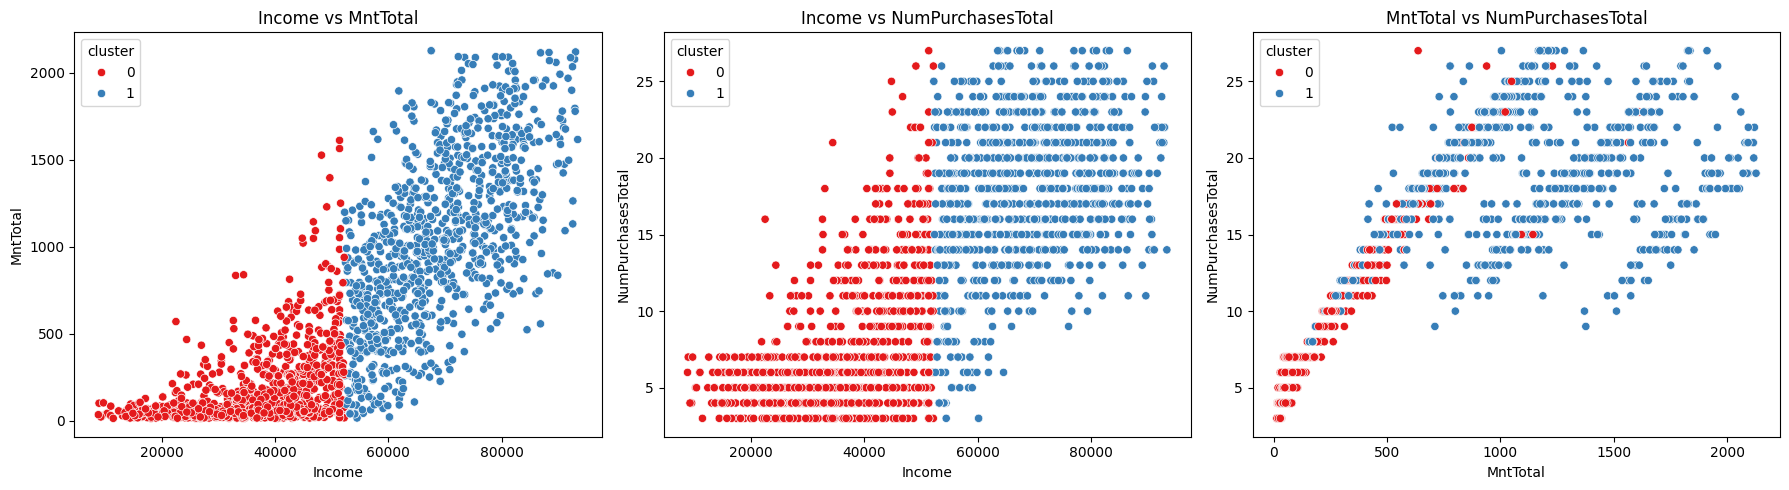

In [64]:
kmeans_scaled = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_scaled.fit(X_filt)

labels = kmeans_scaled.predict(X_filt)
X_f = X_filt.copy()
X_f["cluster"] = kmeans_scaled.labels_

print(silhouette_score(X_f, kmeans_scaled.labels_))
visualize_three_features(X_f, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

- Отримано найвище значення метрики силуету.
- Бачимо, що на візуалізації кластери чітко розділені

Виконаємо кластеризацію на даних з обробленими викидами та із застосованим масштабюуванням.

0.17103097047777685


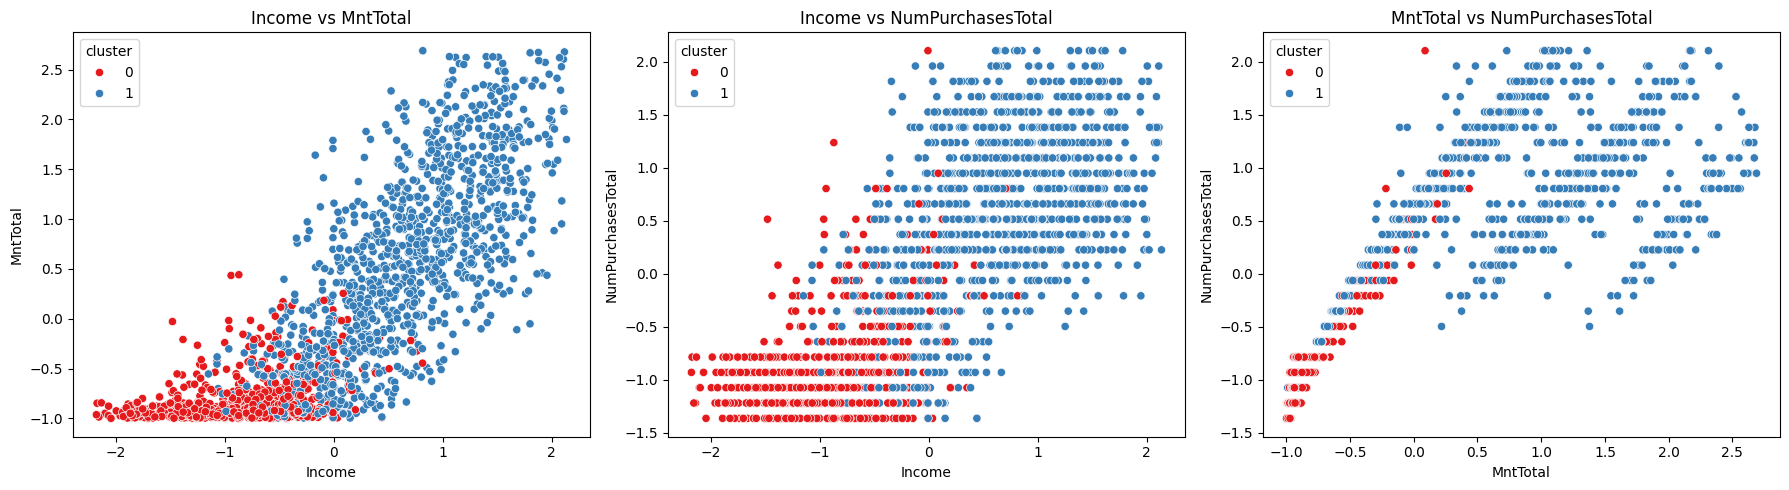

In [65]:
kmeans_scaled = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_scaled.fit(X_scaled_f)

labels = kmeans_scaled.predict(X_scaled_f)
X_sf = X_scaled_f.copy()
X_sf["cluster"] = kmeans_scaled.labels_

print(silhouette_score(X_sf, kmeans_scaled.labels_))
visualize_three_features(X_sf, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

- Знову можемо бачити, що використання набору данних з масштабуванням приводить до погірщення результату.
- Межі кластерів не дуже чіткі, хоча і можемо бачити, що певне розділення наявне.
- Значення метрики силлету суттєво знизилолсь.


Натренуємо для 4 кластерів.

0.5409769338779082


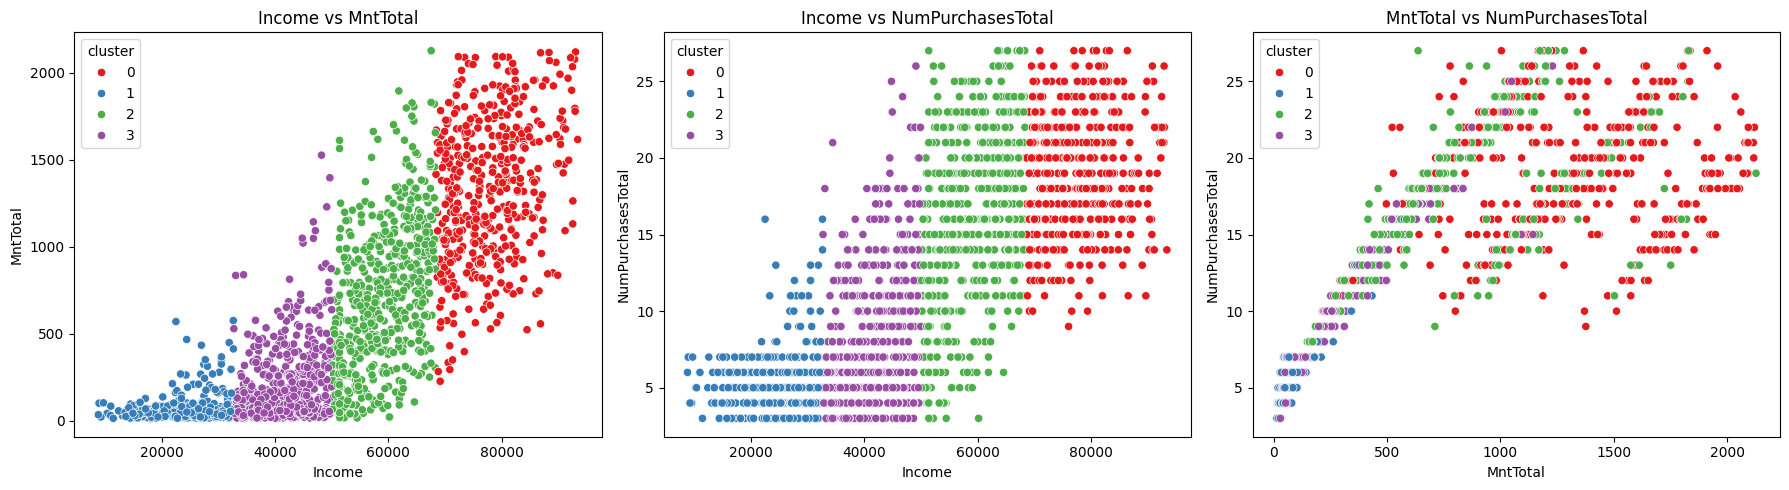

In [66]:
kmeans_scaled = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_scaled.fit(X_filt)

labels = kmeans_scaled.predict(X_filt)
X_f4 = X_filt.copy()
X_f4["cluster"] = kmeans_scaled.labels_

print(silhouette_score(X_f4, kmeans_scaled.labels_))
visualize_three_features(X_f4, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

 Спробувавши застосувати кластеризацію з `k=4`, бачимо, що на візуалізації межі кластерів залишаються достатнбо чіткими для `Income VS MntTotal` та `Income VS NumPurchasesTotal`.
 Значення метрики силуету трохи знизилось у порівнянні з  `k=2`.

**Загальні спостереження**:

- Використання 2-х клсастерів для кластеризація дає найкращий результат зважаючи на значення метрики силуету.

- Бачимо, що застосування лише видалення аномальних значень ефективніше за застосування маштабування та масштабування + обробки викидів.

 > *Гіпотеза: чому так відбулося?*
Очікувалося, що мастабування покращить якість кластеризації, але в розглянутих випадках - цього не сталось. Навпаки, масштабування лише погіршувало якість кластеризації. У розглянутих експериментах кластеризація на основі немасштабованих, але очищених від викидів даних продемонструвала вищу якість за метрикою силуета.
Однією з причин могла стати попередня підготовка даних. Більшість оригінальних фіч не були включені до набору на якому проводилось моделювання. Був виконаний препроцесинг, заповнення відстуніх значнь, агрегація, генерація нових ознак. Усі створені ознаки мають зрозумілу інтерпретацію й логічну шкалу вимірювання.
Деякі ознаки, такі як Income, MntTotal, NumPurchasesTotal, мають природно вищі значення, що відповідає їхній реальній важливості у формуванні поведінки клієнтів. Масштабування призводить до того, що ознаки з меншою вагою (наприклад, PctFruits, is_weekend) починають впливати на формування кластерів так само, як основні поведінкові показники. Це розмиває структуру простору ознак та зменшує здатність моделі чітко ідентифікувати сегменти.
Ймовірно масштабування призвело до вирівнювання шкал усіх фіч, унаслідок чого алгоритм KMeans почав однаково сприймати фічі, які мають різну інформативність. Це негативно вплинуло на результат: кластери втратили чіткість, а силуетна метрика суттєво знизилась.

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [67]:
linked = linkage(X_filt, method='single')

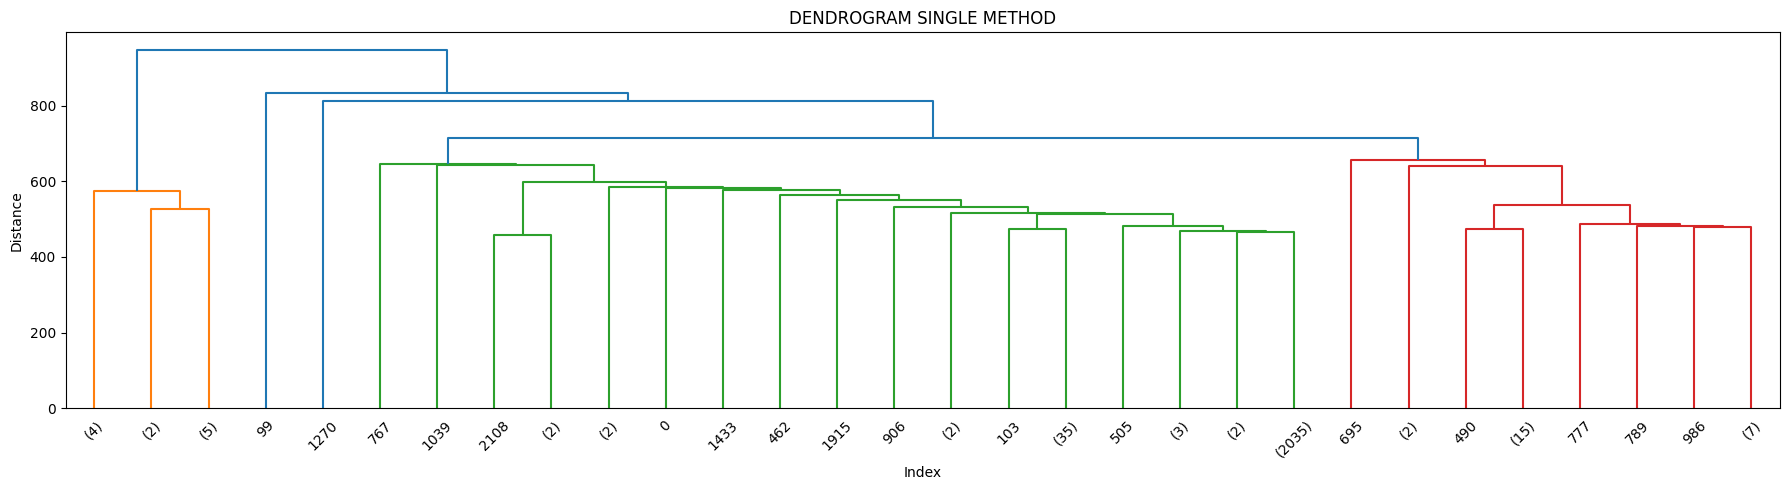

In [68]:
plt.figure(figsize=(18, 5))
dendrogram(linked, truncate_mode='lastp')
plt.title("DENDROGRAM SINGLE METHOD")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

**Спостереження**:

- Бачимо, що на рівні 600–650 існує 3 великі групи, які логічно відокремлені.
- Більшість об’єднань відбуваються на низьких рівнях відстані.
- Декілька спостережень або малих груп зливаються лише на великій відстані
- Гілки мають небалансовану структуру: довгі ланцюги та окремі групи без чіткого відгалуження.

In [69]:
from scipy.cluster.hierarchy import fcluster

clusters_2 = fcluster(linked, 2, criterion='maxclust')
clusters_3 = fcluster(linked, 3, criterion='maxclust')

X_filt_with_clusters_2 = X_filt.copy()
X_filt_with_clusters_2['cluster'] = clusters_2

X_filt_with_clusters_3 = X_filt.copy()
X_filt_with_clusters_3['cluster'] = clusters_3

silhouette_2 = silhouette_score(X_filt, clusters_2)
silhouette_3 = silhouette_score(X_filt, clusters_3)

print(f"Silhouette k=2: {silhouette_2}")
print(f"Silhouette k=3: {silhouette_3}")

Silhouette k=2: 0.3453630508917921
Silhouette k=3: 0.007683278045069539


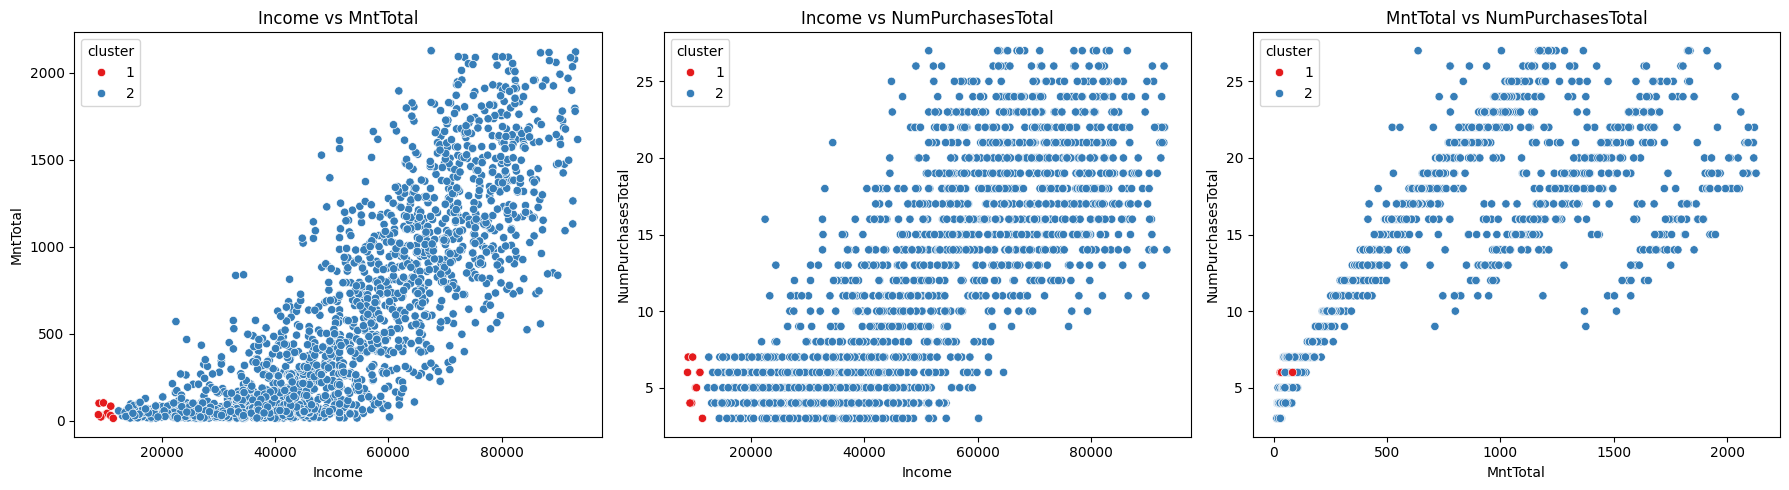

In [70]:
visualize_three_features(X_filt_with_clusters_2, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

- Кластер 1 - дуже малий, складається з декількох точок із низьким доходом, дуже низькими витратами та мінімальною кількістю покупок.
- Кластер 2 - охоплює практично всі інші спостереження.

- Виглядає як те, що кластеризація "виокремила аномалії", а всі решта клієнтів потрапили в одну групу.

- Це розбиття не має практичної цінності як сегментація клієнтів.

- Значення метрики силуету має помірне значення. Один кластер явно щільний, але інший — дуже великий.

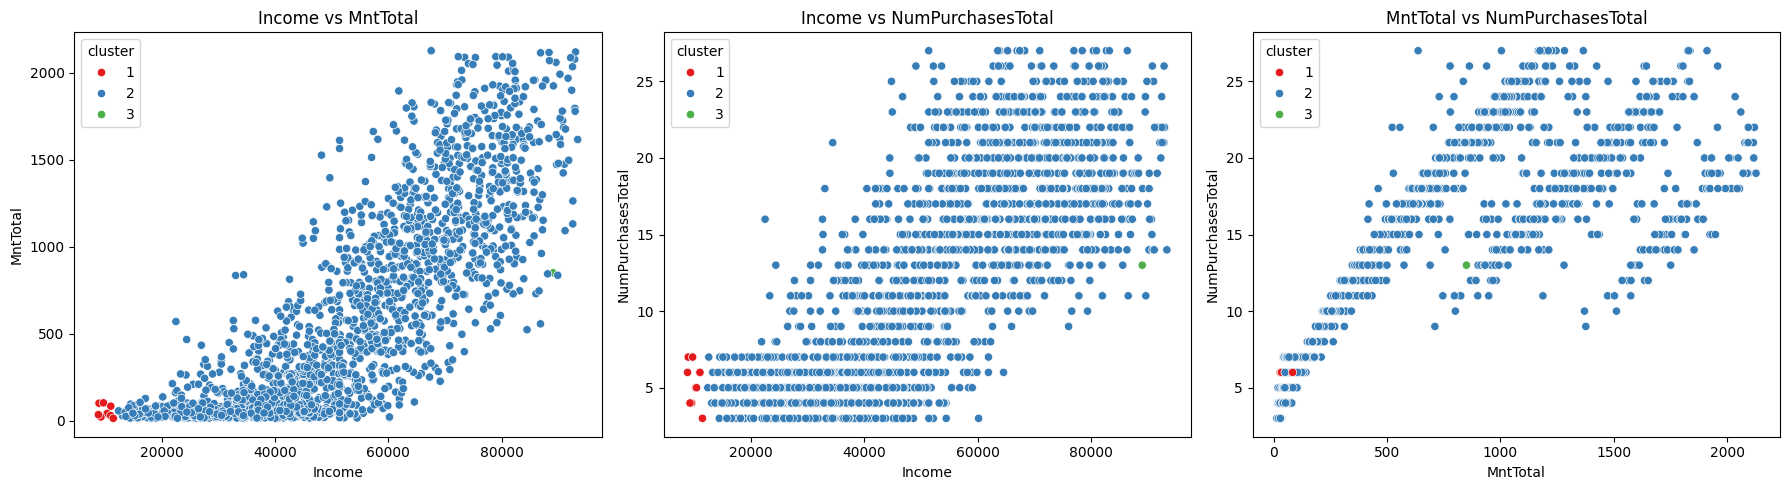

In [71]:
visualize_three_features(X_filt_with_clusters_3, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

- Ситуація аналогічна до k=2. Доданий третій кластер на візуалізації предсталений лише як одна точка, тобто кластер дуже малий.

- Основний поділ між червоним та синім залишається тим самим, що і при k=2.

- Розбиття на k=3 лише відокремлює одну-дві нестандартні точки, не покращуючи структуру.

- Значення метрики силуету Надзвичайно низьке.

**Загальні спостереження:**

Ієрархічна кластеризація з single linkage не виявила логічної багатокластерної структури в даних. Усі варіанти кластеризації (k=2, k=3) виявили або лише одну маленьку групу "слабко активних клієнтів", або точкові аномалії.

Основна маса клієнтів була об’єднана в один великий кластер без внутрішньої сегментації.
Це свідчить про неефективність методу single linkage у даному контексті та підтверджує, що KMeans показує значно кращі результати як за інтерпретацією, так і за метрикою якості.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

##### DBSCAN

In [72]:
db = DBSCAN(eps=5, min_samples=10)
labels_db = db.fit_predict(X_scaled_f)

mask = labels_db != -1
if len(np.unique(labels_db[mask])) > 1:
    sil_score = silhouette_score(X_scaled_f[mask], labels_db[mask])
    print(f"Silhouette Score (DBSCAN, eps=5): {sil_score:.3f}")
else:
    print("Недостатньо кластерів для обчислення Silhouette Score")

Недостатньо кластерів для обчислення Silhouette Score


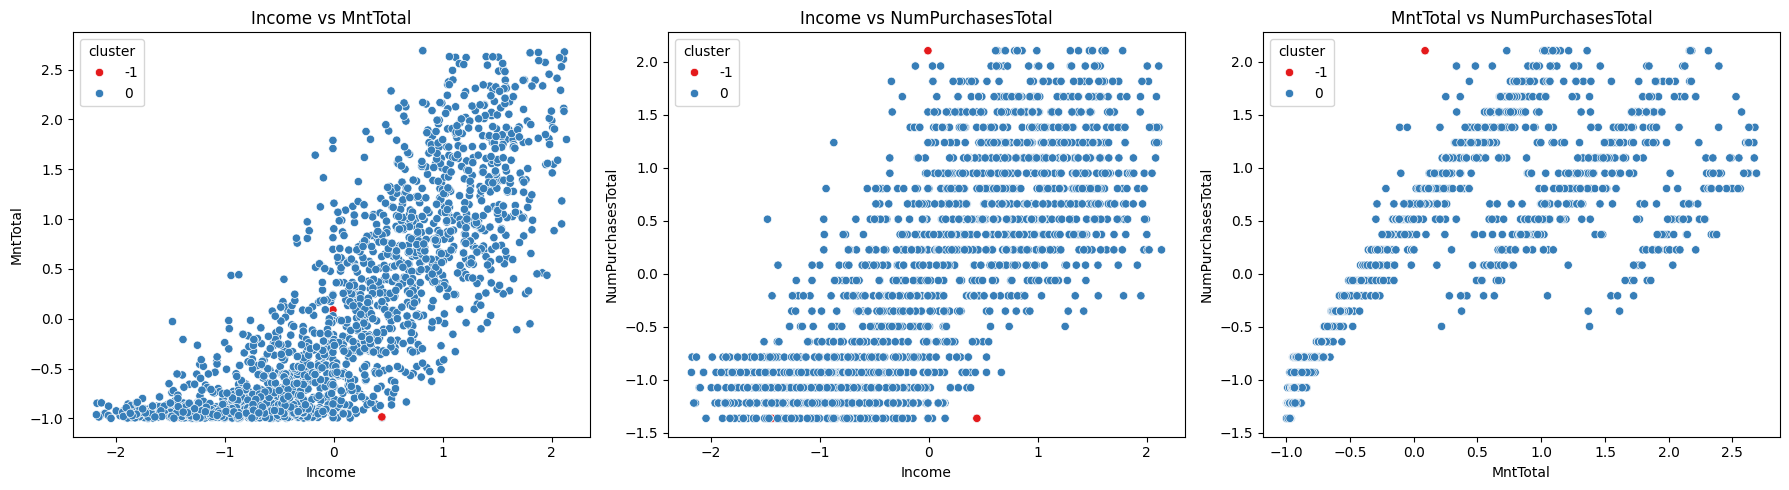

In [73]:
X_vis = X_scaled_f.copy()
X_vis["cluster"] = labels_db
visualize_three_features(X_vis, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:
- Бачимо, DBSCAN виявив лише 1 кластер, а все інше врахував за аномалії.
- Попри те, що DBSCAN має перевагу у виявленні кластерів довільної форми та здатний ідентифікувати шум, у даному випадку він не виявив поведінкових груп, які мали б чітку інтерпретацію.
Це може бути пов'язано з тим, що дані не мають чітко виражених локальних згущень, а натомість утворюють доволі рівномірний простір без явних щільностей.

Нажаль, ця кластеризація не може бути застосованою для визначення сегментів клієнтів.

##### Gaussian Mixture Model

In [74]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled_f)

X_with_gmm = X_scaled_f.copy()
X_with_gmm["cluster"] = gmm_labels

silhouette_gmm = silhouette_score(X_scaled_f, gmm_labels)
label_counts_gmm = dict(zip(*np.unique(gmm_labels, return_counts=True)))
silhouette_gmm, label_counts_gmm


(np.float64(0.09995643970970834),
 {np.int64(0): np.int64(878),
  np.int64(1): np.int64(1182),
  np.int64(2): np.int64(73)})

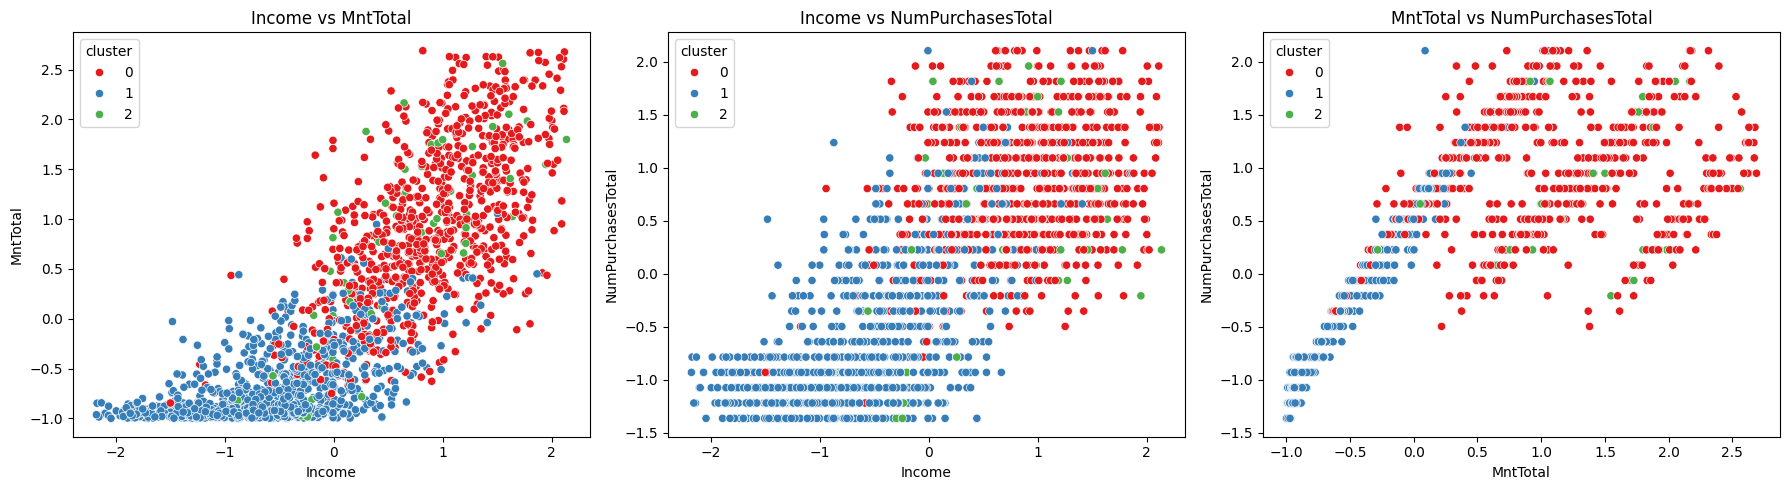

In [75]:
visualize_three_features(X_with_gmm, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

Gaussian Mixture Model дозволила виявити 3 основні кластери з перекриттям. Кластери поділяються здебільшого за рівнем доходу, витрат та активності клієнтів, що відповідає очікуваному сегментуванню.

Хоча силуетна метрика не є високою (0.099), це очікувано з огляду на те, що GMM моделює перехідні, а не чітко розмежовані групи. Таким чином, модель демонструє, що клієнти не мають жорсткої кластерної структури, але певна сегментація на основі поведінки все ж таки присутня.

Нажаль, ця кластеризація не може бути застосованою для визначення сегментів клієнтів.

##### Agglomerative Clustering з Ward linkage

In [76]:
agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
agglo_labels = agglo.fit_predict(X_scaled_f)

X_with_agglo = X_scaled_f.copy()
X_with_agglo["cluster"] = agglo_labels

silhouette_agglo = silhouette_score(X_scaled_f, agglo_labels)
label_counts_agglo = dict(zip(*np.unique(agglo_labels, return_counts=True)))
silhouette_agglo, label_counts_agglo

(np.float64(0.13321889536354736),
 {np.int64(0): np.int64(985),
  np.int64(1): np.int64(539),
  np.int64(2): np.int64(609)})

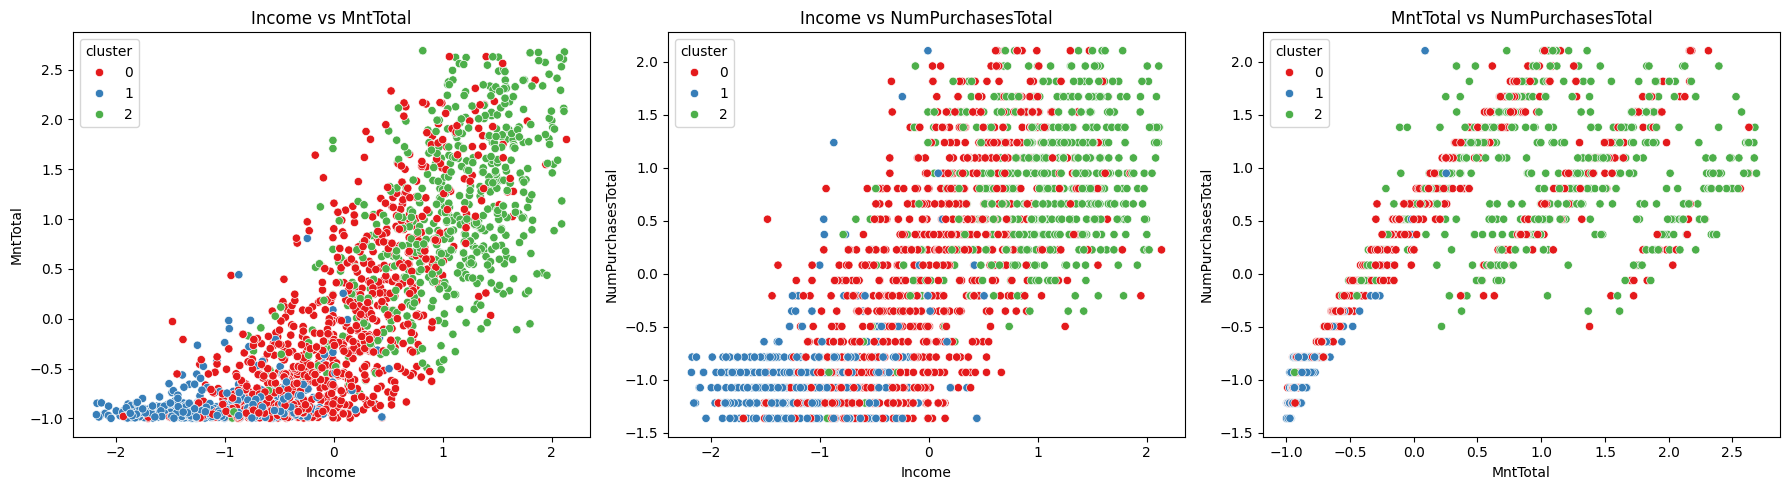

In [77]:
visualize_three_features(X_with_agglo, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

- Модель поділила клієнтів плавно за доходом і витратами.
- На графіках добре видно, як один кластер зосереджений у нижній частині, інші два — поступово охоплюють більш витратних клієнтів.
- Видно послідовну зміну сегментів, що є плюсом для інтерпретації.
- На відміну від DBSCAN, усі точки були класифіковані.
- Agglomerative Clustering з Ward linkage демонструє збалансовану структуру кластерів, які можна інтерпретувати як сегменти за витратами та доходом.
- Значення метрики силуєту залишається достатньо низьким. Подібний до якості KMeans на масштабованих даних.

Нажаль, ця кластеризація не може бути застосованою для визначення сегментів клієнтів.

Спробуємо застосувати цей методо кластеризації для даних без масштабування, але з обробкою викидів.

In [78]:
agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
agglo_labels = agglo.fit_predict(X_filt)

X_with_agglo = X_filt.copy()
X_with_agglo["cluster"] = agglo_labels

silhouette_agglo = silhouette_score(X_filt, agglo_labels)
label_counts_agglo = dict(zip(*np.unique(agglo_labels, return_counts=True)))
silhouette_agglo, label_counts_agglo

(np.float64(0.5381998038724527),
 {np.int64(0): np.int64(940),
  np.int64(1): np.int64(851),
  np.int64(2): np.int64(342)})

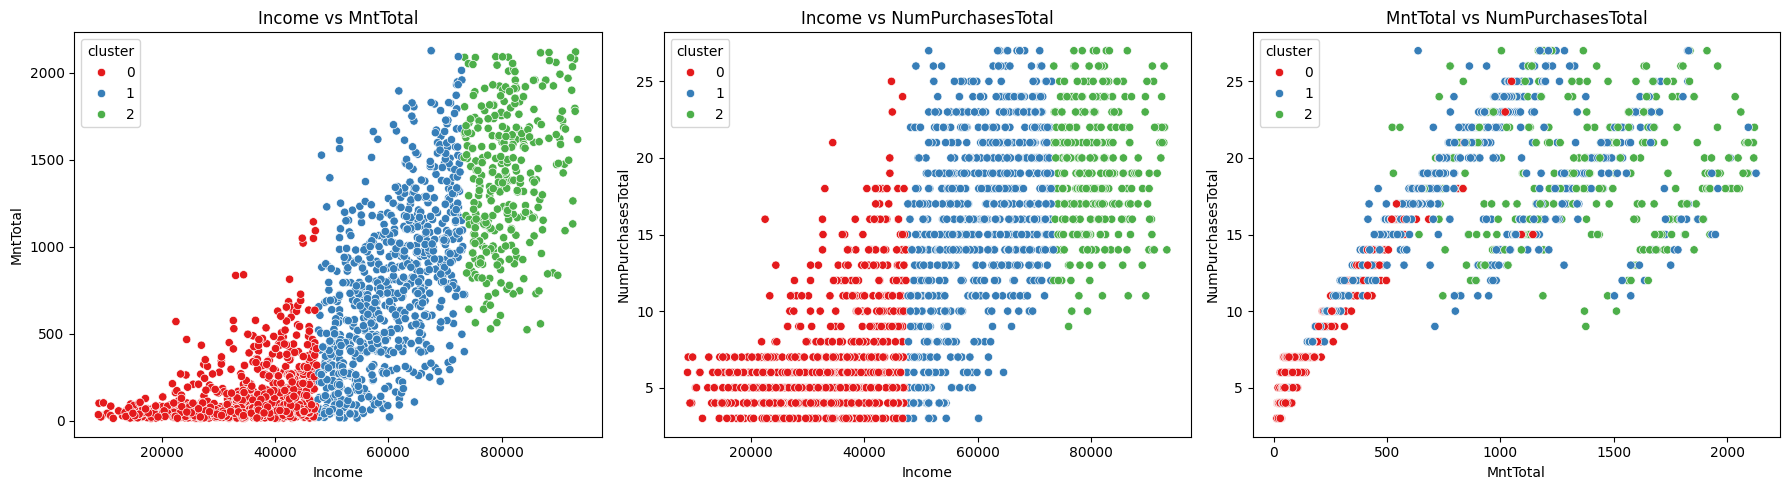

In [79]:
visualize_three_features(X_with_agglo, "Income", "MntTotal", "NumPurchasesTotal")

**Спостереження**:

- Значення метрики силуету вже значно підвищилось
- Виділено три чіткі сегменти клієнтів з різними характеристиками.
- Межі між кластерами чітко видно в просторі Income, MntTotal, NumPurchasesTotal.
- Алгоритм не постраждав від відсутності масштабування, ймовірно оскільки дані вже були достатньо підготовлені.

Модель Agglomerative Clustering з Ward linkage на очищених, немасштабованих даних дає найякісніше розбиття з точки зору внутрішньої структури даних. Вона добре узгоджується з бізнес-логікою, дозволяє легко інтерпретувати сегменти клієнтів.

Потенційно модель може бути застованою для сегментації клієнтів, але варто ще поекспериментувати, та спробувати покращити якість кластеризації.
